## Path Overlap Model for Minigrant / NARSC 2020
**By**: Susan Burtner \
**Date**: 14 October 2020 \
**Last modifed**: 6 November 2020

This is the Jupyter Notebook for testing out the anti-covering model in Python.

<div>
    <img src="attachment:math_updated.png" align= "center" width="600"/>
</div>

## PART 1

### Exploratory analysis / preprocessing

In [1]:
import networkx as nx
import pysal
import spaghetti
import xpress as xp
import pandas as pd
import geopandas as gp
from shapely.geometry import Point
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import random
#import matplotlib_scalebar
#from matplotlib_scalebar.scalebar import ScaleBar

os.chdir("/Users/sburtner/Documents/Minigrant/MRCI/points_lines")
paths = gp.read_file("f4_paths_line.shp")
doors = gp.read_file("f4_doors_point_v5.shp")

os.chdir("/Users/sburtner/Documents/Minigrant/boundaries")
ellison_boundary = gp.read_file("Ellison_boundary.shp")
offices_polygon4 = gp.read_file("offices_polygon4.shp")

#doors_merge = gp.read_file("f4_doors_merge.shp")

print(str(paths.geometry.iloc[0]))
print(paths.crs)

Using the Community license in this session. If you have a full Xpress license, first set the XPRESS environment variable to the directory containing the license file, xpauth.xpr, and then restart Python. If you want to use the FICO Community license and no longer want to see this message, set the XPRESS environment variable to

/Users/sburtner/opt/anaconda3/envs/geo_env/lib/python3.7/site-packages/xpress/license/community-xpauth.xpr

LINESTRING (6005278.18701192 1978621.182191466, 6005281.260756619 1978617.082963587)
epsg:2229


In [2]:
doors.head(10)

,JOIN_FID,Floor,Room_Type,POINT_X,POINT_Y,ORIG_FID,Main_Door,geometry
0,1,4,stairwell_exit,6.005281e+06,1.978617e+06,0,Y,POINT (6005281.261 1978617.083)
1,2,4,office,6.005229e+06,1.978618e+06,1,Y,POINT (6005229.498 1978617.661)
2,3,4,office,6.005219e+06,1.978618e+06,2,Y,POINT (6005219.092 1978617.847)
3,4,4,office,6.005199e+06,1.978618e+06,3,Y,POINT (6005199.490 1978618.197)
4,5,4,office,6.005147e+06,1.978619e+06,4,Y,POINT (6005147.191 1978619.171)
5,6,4,office,6.005138e+06,1.978619e+06,5,Y,POINT (6005138.064 1978619.294)
6,7,4,office,6.005128e+06,1.978619e+06,6,Y,POINT (6005127.598 1978619.481)
7,8,4,office,6.005117e+06,1.978620e+06,7,Y,POINT (6005117.132 1978619.668)
8,9,4,office,6.005107e+06,1.978620e+06,8,Y,POINT (6005106.665 1978619.855)
9,10,4,office,6.005096e+06,1.978620e+06,9,Y,POINT (6005096.199 1978620.042)


In [3]:
paths.head(10)

,FID_f4_pat,Shape_Leng,Floor,geometry
0,0,5.123629,4,"LINESTRING (6005278.187 1978621.182, 6005281.2..."
1,55,4.290517,4,"LINESTRING (6005271.521 1978621.540, 6005271.2..."
2,57,104.578073,4,"LINESTRING (6005271.521 1978621.540, 6005278.1..."
3,57,104.578073,4,"LINESTRING (6005270.997 1978621.568, 6005271.5..."
4,54,4.392712,4,"LINESTRING (6005262.494 1978621.775, 6005262.2..."
5,57,104.578073,4,"LINESTRING (6005262.494 1978621.775, 6005265.5..."
6,57,104.578073,4,"LINESTRING (6005260.807 1978621.803, 6005262.4..."
7,57,104.578073,4,"LINESTRING (6005250.347 1978621.972, 6005253.4..."
8,53,4.388468,4,"LINESTRING (6005245.880 1978622.044, 6005245.8..."
9,57,104.578073,4,"LINESTRING (6005245.880 1978622.044, 6005246.8..."


In [4]:
## MUST RUN

offices = doors[(doors.Room_Type == 'office') & (doors.Main_Door == 'Y')]

avoid = doors[(doors.Room_Type != 'office') & (doors.Main_Door == 'Y')]
bathrooms = avoid[avoid.Room_Type == 'bathroom']
lounge = avoid[(avoid.Room_Type == 'lounge')]
exits = avoid[avoid.Room_Type.str.startswith('stairwell_ex')]

#print(len(exits))

In [415]:
#ntw = spaghetti.Network(paths)

# Snap offices to network
#ntw.snapobservations(doors, "offices", attribute=True)

#true_offices_df = spaghetti.element_as_gdf(ntw, pp_name="offices", snapped=False)
#snapped_offices = spaghetti.element_as_gdf(ntw, pp_name="offices", snapped=True)

In [416]:
#print("Number of components = " + str(ntw.network_n_components))

In [417]:
#vertices_df, arcs_df = spaghetti.element_as_gdf(ntw, vertices=True, arcs=True)

In [418]:
# create legend arguments and keyword arguments for matplotlib
#args = [], []
#kwargs = {"c":"k"}

# set arcs legend entry
#arcs = mlines.Line2D(*args, **kwargs, label="Network Arcs", alpha=0.5)

# update keyword arguments for matplotlib
#kwargs.update({"lw":0})

# set vertices legend entry
#vertices = mlines.Line2D(
#    *args, **kwargs, ms=2.5, marker="o", label="Network Vertices"
#)

In [419]:
# set true office locations legend entry
#toffices = mlines.Line2D(*args, **kwargs, ms=10, marker="X", label="Office Locations")

# set network-snapped office locations legend entry
#soffices = mlines.Line2D(*args, **kwargs, ms=12, marker="X", label="Snapped Offices")

In [420]:
# combine all legend patches
#patches = [arcs, vertices, soffices]#, toffices]

In [421]:
#base = arcs_df.plot(color="k", alpha=0.25, figsize=(12, 12), zorder=0)

# create vertices keyword arguments for matplotlib
#kwargs = {"ax":base}
#vertices_df.plot(color="k", markersize=5, alpha=1, **kwargs)

# update offices keyword arguments for matplotlib
#kwargs.update({"cmap":"tab20", "column":"id", "zorder":2})
#true_offices_df.plot(marker="X", markersize=25, **kwargs)
#snapped_offices.plot(marker="X", markersize=25, **kwargs)

#snapped_offices_df.plot(markersize=200, **kwargs)

# add scale bar
#kw = {"units":"ft", "dimension":"imperial-length", "fixed_value":1000}
#base.add_artist(ScaleBar(1, location="lower left", box_alpha=.75, **kw))

#base = arcs_df.plot(linewidth=3, alpha=0.25, color="k", zorder=0, figsize=(10, 10))
#vertices_df.plot(ax=base, markersize=20, color="red", zorder=1);

# add legend
#plt.legend(
#    handles=patches,
#    fancybox=True,
#    framealpha=0.8,
#    scatterpoints=1,
#    fontsize="xx-large",
#    bbox_to_anchor=(1.04, 0.75),
#    borderpad=2.,
#    labelspacing=2.
#);

## PART 2

In [5]:
## MUST RUN

#os.chdir("/Users/sburtner/Documents/Minigrant/MRCI/points_lines")
#doors = gp.read_file("f4_doors_point.shp")
#paths = gp.read_file("f4_paths_line.shp")

# Snap objects to network
ntw = spaghetti.Network(paths)
ntw.snapobservations(offices, "offices", attribute=True)
ntw.snapobservations(bathrooms, "bathrooms", attribute=True)
ntw.snapobservations(exits, "exits", attribute=True)
ntw.snapobservations(lounge, "lounge", attribute=True)
ntw.snapobservations(avoid, "avoid", attribute=True)

# Create geometric elements out of snapped observations for plotting
snapped_offices = spaghetti.element_as_gdf(ntw, pp_name="offices", snapped=True)
#snapped_bathrooms = spaghetti.element_as_gdf(ntw, pp_name="bathrooms", snapped=True)
#snapped_exits = spaghetti.element_as_gdf(ntw, pp_name="exits", snapped=True)
#snapped_lounge = spaghetti.element_as_gdf(ntw, pp_name="lounge", snapped=True)
snapped_avoid = spaghetti.element_as_gdf(ntw, pp_name="avoid", snapped=True)

# Create network
vertices, arcs = spaghetti.element_as_gdf(ntw, vertices=True, arcs=True)

## FOR PAIRWISE RESTRICTION, offices to offices

# Calculate distances between all offices and their neighbors
d2d_dist, tree = ntw.allneighbordistances("offices", gen_tree=True)
shortest_paths = ntw.shortest_paths(tree, "offices")
shortest_paths_gdf = spaghetti.element_as_gdf(ntw, routes=shortest_paths)

shortest_paths_gdf['path_length'] = shortest_paths_gdf.geometry.length
shortest_paths_gdf['id_join'] = "(" + shortest_paths_gdf['O'].astype(str) + ', ' + shortest_paths_gdf['D'].astype(str) + ")"
shortest_paths_gdf.head(10)

#shortest_paths_gdf.describe()
#snapped_avoid.head(10)

,geometry,O,D,id,path_length,id_join
0,"LINESTRING (6005229.498 1978617.661, 6005229.5...",0,1,"(0, 1)",19.683432,"(0, 1)"
1,"LINESTRING (6005229.498 1978617.661, 6005229.5...",0,2,"(0, 2)",39.555676,"(0, 2)"
2,"LINESTRING (6005229.498 1978617.661, 6005229.5...",0,3,"(0, 3)",91.434604,"(0, 3)"
3,"LINESTRING (6005229.498 1978617.661, 6005229.5...",0,4,"(0, 4)",100.586798,"(0, 4)"
4,"LINESTRING (6005229.498 1978617.661, 6005229.5...",0,5,"(0, 5)",111.037126,"(0, 5)"
5,"LINESTRING (6005229.498 1978617.661, 6005229.5...",0,6,"(0, 6)",121.197757,"(0, 6)"
6,"LINESTRING (6005229.498 1978617.661, 6005229.5...",0,7,"(0, 7)",131.937162,"(0, 7)"
7,"LINESTRING (6005229.498 1978617.661, 6005229.5...",0,8,"(0, 8)",142.387525,"(0, 8)"
8,"LINESTRING (6005229.498 1978617.661, 6005229.5...",0,9,"(0, 9)",157.279398,"(0, 9)"
9,"LINESTRING (6005229.498 1978617.661, 6005229.5...",0,10,"(0, 10)",50.743723,"(0, 10)"


In [6]:
# Helper function for labels
def obs_labels(o, b, s, id_col, c, order):
    """Label each point pattern observation."""
    def _lab_loc(_x):
        """Helper for labeling observations."""
        return _x.geometry.coords[0]
    kws = {"size": s, "ha": "left", "va": "bottom", "style": "oblique", "c":c, "zorder": order}
    o.apply(lambda x: b.annotate(text=x[id_col], xy=_lab_loc(x), **kws), axis=1)

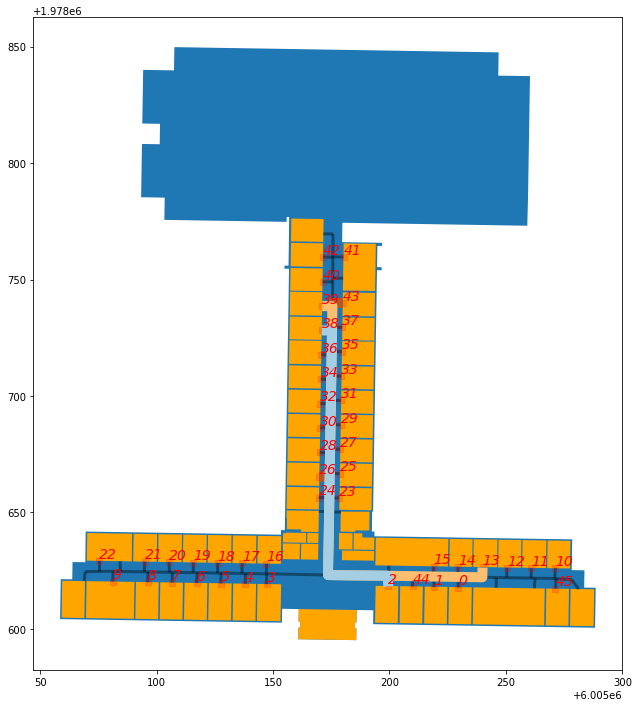

In [7]:
base = ellison_boundary.plot(figsize=(12, 12), zorder=0)
offices_polygon4.plot(ax=base, color='orange', zorder=1)
arcs.plot(ax=base, alpha=0.4, linewidth=3, color="black", figsize=(12, 12), zorder=2)
snapped_offices.plot(ax=base, alpha=0.2, color="red", marker="s", zorder=3)
shortest_paths_gdf.sample(3).plot(ax=base, column="id", cmap="Paired", linewidth=10, zorder=4)
obs_labels(snapped_offices, base, 14, 'id', 'red', 4)

In [425]:
#base = ellison_boundary.plot(figsize=(12, 12), zorder=0)
#offices_polygon4.plot(ax=base, color='orange', zorder=1)
#arcs.plot(ax=base, alpha=0.4, linewidth=3, color="black", figsize=(12, 12), zorder=2)
#snapped_offices.plot(ax=base, alpha=0.2, color="red", marker="s", zorder=3)
#nn_paths_gdf[0:5].plot(ax=base, column="id", cmap="Paired", linewidth=10);
#obs_labels(snapped_offices, base, 14, 'id');

In [426]:
#shortest_paths_gdf[shortest_paths_gdf.path_length <= 21]
#shortest_paths_gdf[shortest_paths_gdf.O == 30]

# Around 10 feet by Euclidean distance between offices, but 20 feet by network distance

<div>
    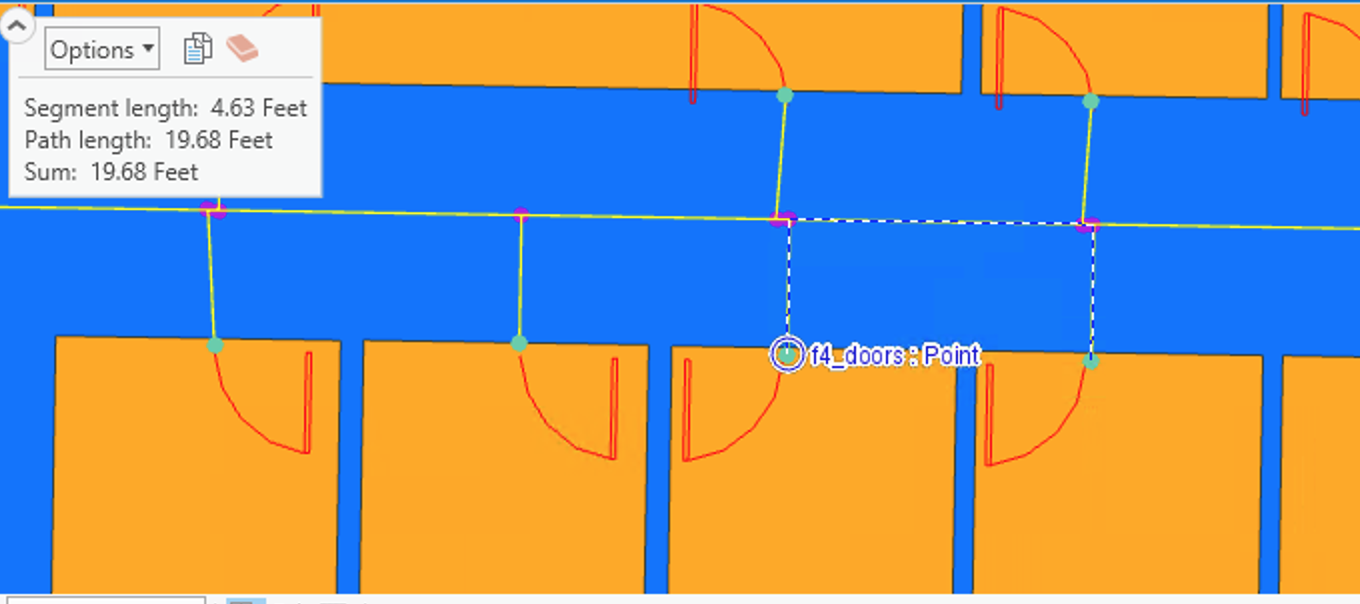
</div>

<div>
    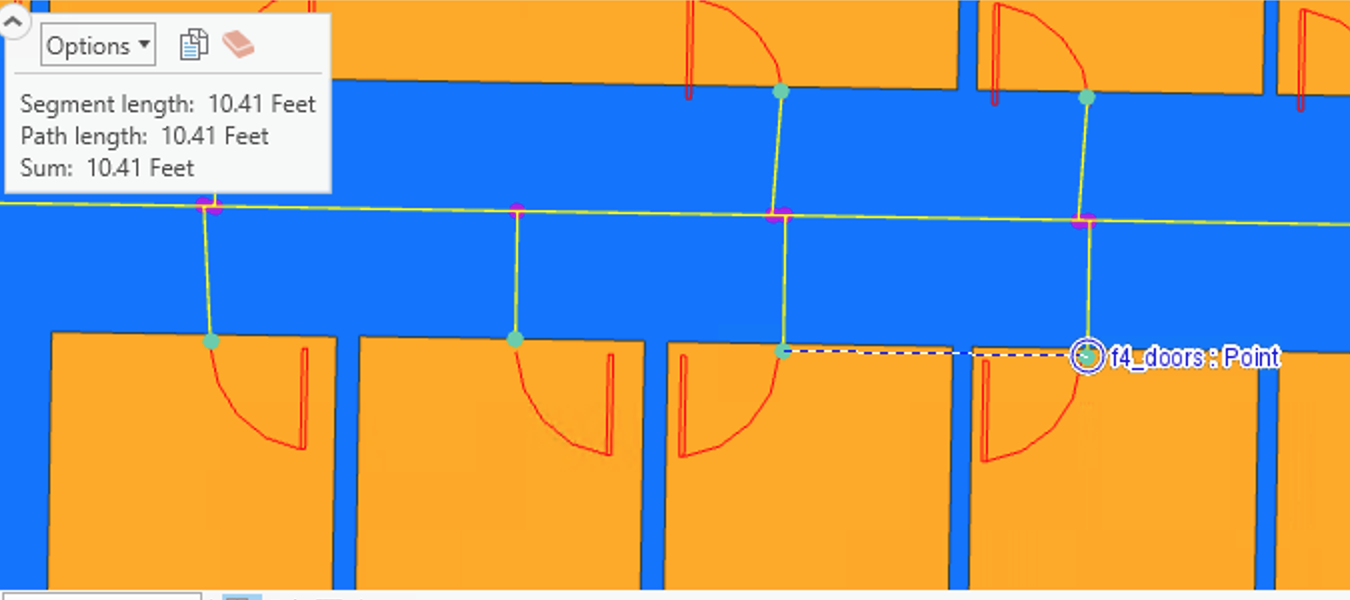
</div>

In [8]:
# EXTENSION - PATH OVERLAP

# Calculate distances between each office and "avoid" features (bathrooms, exits, lounge)
b_dist, b_tree = ntw.allneighbordistances('offices', 'bathrooms', gen_tree=True)
#e_dist, e_tree = ntw.allneighbordistances('offices', 'exits', gen_tree=True)
l_dist, l_tree = ntw.allneighbordistances('offices', 'lounge', gen_tree=True)

# Creates geometric object from those paths
b_paths = ntw.shortest_paths(b_tree, "offices", "bathrooms")
#e_paths = ntw.shortest_paths(e_tree, "offices", "exits")
l_paths = ntw.shortest_paths(l_tree, "offices", "lounge")

# Creates geopandas dataframe from paths
b_paths_gdf = spaghetti.element_as_gdf(ntw, routes=b_paths)
#e_paths_gdf = spaghetti.element_as_gdf(ntw, routes=e_paths)
l_paths_gdf = spaghetti.element_as_gdf(ntw, routes=l_paths)

# Formalize path length
b_paths_gdf['path_length'] = b_paths_gdf.geometry.length
#e_paths_gdf['path_length'] = e_paths_gdf.geometry.length
l_paths_gdf['path_length'] = l_paths_gdf.geometry.length

# Manually set index of avoidances
# Leave exits, since there is two
# exit 1 -> 0
# exit 2 -> 1
# bathroom -> 2
# lounge -> 3
b_paths_gdf.D = 0
l_paths_gdf.D = 1

# Only get nearest bathroom
b_paths_min = b_paths_gdf.groupby('O').path_length.transform(min)
b_paths_gdf = b_paths_gdf[b_paths_gdf['path_length'] == b_paths_min]

# Only get nearest exit
#e_paths_min = e_paths_gdf.groupby('O').path_length.transform(min)
#e_paths_gdf = e_paths_gdf[e_paths_gdf['path_length'] == e_paths_min]

#avoid_paths_gdf = pd.concat([b_paths_gdf, e_paths_gdf, l_paths_gdf]).reset_index(drop=True)
avoid_paths_gdf = pd.concat([b_paths_gdf, l_paths_gdf]).reset_index(drop=True)

avoid_paths_gdf = avoid_paths_gdf.sort_values(by=['O', 'D'])
avoid_paths_gdf.head(10)

#avoid_paths_gdf.D.nunique()

,geometry,O,D,id,path_length
0,"LINESTRING (6005229.498 1978617.661, 6005229.5...",0,0,"(0, 1)",92.240050
46,"LINESTRING (6005229.498 1978617.661, 6005229.5...",0,1,"(0, 0)",41.964513
1,"LINESTRING (6005219.092 1978617.847, 6005219.1...",1,0,"(1, 1)",81.815413
47,"LINESTRING (6005219.092 1978617.847, 6005219.1...",1,1,"(1, 0)",52.354992
2,"LINESTRING (6005199.490 1978618.197, 6005199.2...",2,0,"(2, 1)",61.894062
48,"LINESTRING (6005199.490 1978618.197, 6005199.2...",2,1,"(2, 0)",72.227236
3,"LINESTRING (6005147.191 1978619.171, 6005147.2...",3,0,"(3, 1)",62.489964
49,"LINESTRING (6005147.191 1978619.171, 6005147.2...",3,1,"(3, 0)",124.106164
4,"LINESTRING (6005138.064 1978619.294, 6005138.1...",4,0,"(4, 1)",71.642157
50,"LINESTRING (6005138.064 1978619.294, 6005138.1...",4,1,"(4, 0)",133.258358


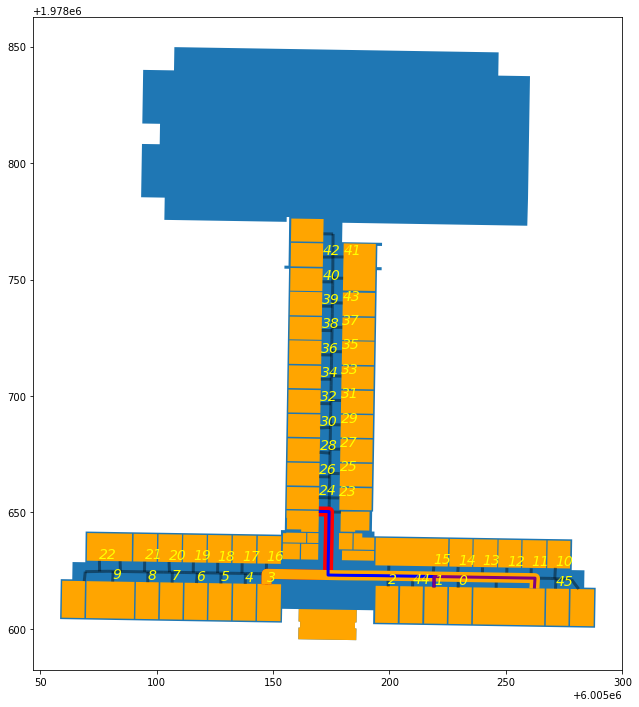

In [9]:
off_num = 3
test = avoid_paths_gdf[avoid_paths_gdf.O == off_num]

off_num = 1
test1 = avoid_paths_gdf[avoid_paths_gdf.O == off_num]

base = ellison_boundary.plot(figsize=(12, 12), zorder=0)
offices_polygon4.plot(ax=base, color='orange', zorder=1)
arcs.plot(ax=base, alpha=0.4, linewidth=3, color="black", figsize=(12, 12), zorder=2)
test.plot(ax=base, color=["red", "orange"], linewidth=10, zorder=3)
test1.plot(ax=base, color=["blue", "purple"], linewidth=3, zorder=4)
obs_labels(snapped_offices, base, 14, 'id', 'yellow', 5)
#obs_labels(avoid_D, base, 20, 'D', 'red', 

In [10]:
# Derive label for avoidances, but must rerun since it overwrites avoid_paths_gdf
#avoid_D = avoid_paths_gdf

#avoid_D['geometry'] = avoid_D['geometry'].apply(lambda row: Point(row.coords[-1]))
#avoid_D = avoid_D.drop(['O', 'id', 'path_length'], axis=1)

#avoid_D = avoid_D.drop_duplicates()

#avoid_D.head(10)

In [10]:
# Union paths by origin index
a_union = avoid_paths_gdf.dissolve(by='O', aggfunc='sum').reset_index()

# Intersect with other paths
a_intersection = gp.overlay(a_union, a_union, how='intersection')
a_intersection['overlap_path_length'] = a_intersection.geometry.length

In [11]:
a_intersection.sort_values("overlap_path_length").tail(10)

,O_1,D_1,path_length_1,O_2,D_2,path_length_2,geometry,overlap_path_length
1881,41,1,352.784914,40,1,330.972502,"MULTILINESTRING ((6005175.631 1978749.005, 600...",223.561407
1882,42,1,351.991653,40,1,330.972502,"MULTILINESTRING ((6005175.631 1978749.005, 600...",223.561407
1926,40,1,330.972502,41,1,352.784914,"MULTILINESTRING ((6005175.631 1978749.005, 600...",223.561407
1972,40,1,330.972502,42,1,351.991653,"MULTILINESTRING ((6005175.631 1978749.005, 600...",223.561407
1034,22,1,330.226342,22,1,330.226342,"MULTILINESTRING ((6005075.440 1978629.206, 600...",227.568976
1880,40,1,330.972502,40,1,330.972502,"MULTILINESTRING ((6005171.250 1978749.041, 600...",227.942056
1928,42,1,351.991653,41,1,352.784914,"MULTILINESTRING ((6005175.705 1978759.645, 600...",234.202169
1973,41,1,352.784914,42,1,351.991653,"MULTILINESTRING ((6005175.705 1978759.645, 600...",234.202169
1974,42,1,351.991653,42,1,351.991653,"MULTILINESTRING ((6005171.455 1978759.672, 600...",238.451632
1927,41,1,352.784914,41,1,352.784914,"MULTILINESTRING ((6005180.260 1978759.708, 600...",238.848262


In [12]:
# Remove paths with themselves
a_intersection1 = a_intersection[a_intersection.O_1 != a_intersection.O_2].reset_index()

In [13]:
a_intersection1.sort_values('overlap_path_length').tail(10)

#print(len(a_intersection1))
#print(46*45)

,index,O_1,D_1,path_length_1,O_2,D_2,path_length_2,geometry,overlap_path_length
1977,2020,42,1,351.991653,43,1,312.972025,"MULTILINESTRING ((6005175.521 1978740.005, 600...",214.561218
1932,1975,43,1,312.972025,42,1,351.991653,"MULTILINESTRING ((6005175.521 1978740.005, 600...",214.561218
999,1021,9,1,318.285716,22,1,330.226342,"MULTILINESTRING ((6005081.356 1978624.702, 600...",217.202989
426,436,22,1,330.226342,9,1,318.285716,"MULTILINESTRING ((6005081.356 1978624.702, 600...",217.202989
1885,1926,40,1,330.972502,41,1,352.784914,"MULTILINESTRING ((6005175.631 1978749.005, 600...",223.561407
1930,1972,40,1,330.972502,42,1,351.991653,"MULTILINESTRING ((6005175.631 1978749.005, 600...",223.561407
1840,1881,41,1,352.784914,40,1,330.972502,"MULTILINESTRING ((6005175.631 1978749.005, 600...",223.561407
1841,1882,42,1,351.991653,40,1,330.972502,"MULTILINESTRING ((6005175.631 1978749.005, 600...",223.561407
1886,1928,42,1,351.991653,41,1,352.784914,"MULTILINESTRING ((6005175.705 1978759.645, 600...",234.202169
1931,1973,41,1,352.784914,42,1,351.991653,"MULTILINESTRING ((6005175.705 1978759.645, 600...",234.202169


Overlap of office 1 with office 3: 124.91160970670734
Overlap of office 3 with office 1: 124.91160970670732


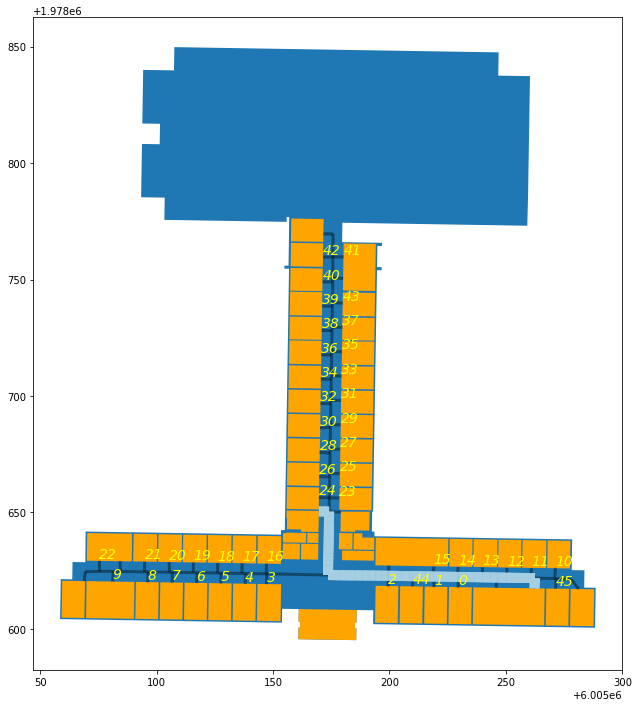

In [14]:
# CHECK TO MAKE SURE OVERLAP IS WORKING
officeID1 = 1
officeID2 = 3

#[x_2, x_3, x_12, x_20, x_23, x_32, x_39]

#officeID1 = 22
#officeID2 = 45

test1 = a_intersection1[(a_intersection1.O_1 == officeID1) & (a_intersection1.O_2 == officeID2)]
test2 = a_intersection1[(a_intersection1.O_1 == officeID2) & (a_intersection1.O_2 == officeID1)]

base = ellison_boundary.plot(figsize=(12, 12), zorder=0)
offices_polygon4.plot(ax=base, color='orange', zorder=1)
arcs.plot(ax=base, alpha=0.4, linewidth=3, color="black", figsize=(12, 12), zorder=2)
test1.plot(ax=base, column="index", cmap="Paired", linewidth=10, zorder=3)
test2.plot(ax=base, column="index", cmap="Paired", linewidth=10, zorder=4)
obs_labels(snapped_offices, base, 14, 'id', 'yellow', 4)
#obs_labels(avoid_D, base, 20, 'D', 'red', 5)

print("Overlap of office " + str(officeID1) + " with office " + str(officeID2) + ": " + str(sum(test1.overlap_path_length)))
print("Overlap of office " + str(officeID2) + " with office " + str(officeID1) + ": " + str(sum(test2.overlap_path_length)))

#test1
#test2

In [15]:
# Clean up dataframe
a_final = a_intersection1.drop(columns=['index','D_1', 'D_2', 'path_length_1', 'path_length_2'])

In [16]:
a_final.sort_values(by='overlap_path_length').tail(10)

,O_1,O_2,geometry,overlap_path_length
1977,42,43,"MULTILINESTRING ((6005175.521 1978740.005, 600...",214.561218
1932,43,42,"MULTILINESTRING ((6005175.521 1978740.005, 600...",214.561218
999,9,22,"MULTILINESTRING ((6005081.356 1978624.702, 600...",217.202989
426,22,9,"MULTILINESTRING ((6005081.356 1978624.702, 600...",217.202989
1885,40,41,"MULTILINESTRING ((6005175.631 1978749.005, 600...",223.561407
1930,40,42,"MULTILINESTRING ((6005175.631 1978749.005, 600...",223.561407
1840,41,40,"MULTILINESTRING ((6005175.631 1978749.005, 600...",223.561407
1841,42,40,"MULTILINESTRING ((6005175.631 1978749.005, 600...",223.561407
1886,42,41,"MULTILINESTRING ((6005175.705 1978759.645, 600...",234.202169
1931,41,42,"MULTILINESTRING ((6005175.705 1978759.645, 600...",234.202169


In [17]:
# Test to make sure there each ID can only be found in two entries
offnum1 = 1
offnum2 = 3

a_final[(a_final.O_1 == offnum1) & (a_final.O_2 == offnum2)]

,O_1,O_2,geometry,overlap_path_length
136,1,3,"MULTILINESTRING ((6005219.167 1978622.475, 600...",124.91161


In [18]:
a_final['id'] = a_final['O_1'].astype(str) + '_' + a_final['O_2'].astype(str)
a_final['id_join'] = "(" + a_final['O_1'].astype(str) + ', ' + a_final['O_2'].astype(str) + ")"
a_final["oid"] = a_final['id'].apply(lambda x: "Z_%s" % x)

a_final.sort_values("overlap_path_length").tail(10)

,O_1,O_2,geometry,overlap_path_length,id,id_join,oid
1977,42,43,"MULTILINESTRING ((6005175.521 1978740.005, 600...",214.561218,42_43,"(42, 43)",Z_42_43
1932,43,42,"MULTILINESTRING ((6005175.521 1978740.005, 600...",214.561218,43_42,"(43, 42)",Z_43_42
999,9,22,"MULTILINESTRING ((6005081.356 1978624.702, 600...",217.202989,9_22,"(9, 22)",Z_9_22
426,22,9,"MULTILINESTRING ((6005081.356 1978624.702, 600...",217.202989,22_9,"(22, 9)",Z_22_9
1885,40,41,"MULTILINESTRING ((6005175.631 1978749.005, 600...",223.561407,40_41,"(40, 41)",Z_40_41
1930,40,42,"MULTILINESTRING ((6005175.631 1978749.005, 600...",223.561407,40_42,"(40, 42)",Z_40_42
1840,41,40,"MULTILINESTRING ((6005175.631 1978749.005, 600...",223.561407,41_40,"(41, 40)",Z_41_40
1841,42,40,"MULTILINESTRING ((6005175.631 1978749.005, 600...",223.561407,42_40,"(42, 40)",Z_42_40
1886,42,41,"MULTILINESTRING ((6005175.705 1978759.645, 600...",234.202169,42_41,"(42, 41)",Z_42_41
1931,41,42,"MULTILINESTRING ((6005175.705 1978759.645, 600...",234.202169,41_42,"(41, 42)",Z_41_42


In [19]:
# Join the overlap_path_length with shortest_path_length
overlap_join = a_final.join(shortest_paths_gdf.set_index('id_join'), on='id_join', how="left", lsuffix="l", rsuffix="r")
overlap_join.head(10)

# O, O_1 - office 1 ID
# D, O_2 - office 2 ID

,O_1,O_2,geometryl,overlap_path_length,idl,id_join,oid,geometryr,O,D,idr,path_length
0,1,0,"MULTILINESTRING ((6005219.167 1978622.475, 600...",124.91161,1_0,"(1, 0)",Z_1_0,None,NaN,NaN,NaN,NaN
1,2,0,"MULTILINESTRING ((6005199.273 1978622.797, 600...",124.91161,2_0,"(2, 0)",Z_2_0,None,NaN,NaN,NaN,NaN
2,3,0,"MULTILINESTRING ((6005173.633 1978623.118, 600...",124.91161,3_0,"(3, 0)",Z_3_0,None,NaN,NaN,NaN,NaN
3,4,0,"MULTILINESTRING ((6005173.633 1978623.118, 600...",124.91161,4_0,"(4, 0)",Z_4_0,None,NaN,NaN,NaN,NaN
4,5,0,"MULTILINESTRING ((6005173.633 1978623.118, 600...",124.91161,5_0,"(5, 0)",Z_5_0,None,NaN,NaN,NaN,NaN
5,6,0,"MULTILINESTRING ((6005173.633 1978623.118, 600...",124.91161,6_0,"(6, 0)",Z_6_0,None,NaN,NaN,NaN,NaN
6,7,0,"MULTILINESTRING ((6005173.633 1978623.118, 600...",124.91161,7_0,"(7, 0)",Z_7_0,None,NaN,NaN,NaN,NaN
7,8,0,"MULTILINESTRING ((6005173.633 1978623.118, 600...",124.91161,8_0,"(8, 0)",Z_8_0,None,NaN,NaN,NaN,NaN
8,9,0,"MULTILINESTRING ((6005173.633 1978623.118, 600...",124.91161,9_0,"(9, 0)",Z_9_0,None,NaN,NaN,NaN,NaN
9,10,0,"MULTILINESTRING ((6005262.494 1978621.775, 600...",124.91161,10_0,"(10, 0)",Z_10_0,None,NaN,NaN,NaN,NaN


In [20]:
overlap_final = overlap_join.drop(labels=["idl", "geometryl", "geometryr", "O", "D", "idr", "path_length"], axis=1).dropna().reset_index()

len(overlap_final)

2070

In [21]:
overlap_final.sort_values("overlap_path_length").tail(10)

,index,O_1,O_2,overlap_path_length,id_join,oid
1977,1977,42,43,214.561218,"(42, 43)",Z_42_43
1932,1932,43,42,214.561218,"(43, 42)",Z_43_42
999,999,9,22,217.202989,"(9, 22)",Z_9_22
426,426,22,9,217.202989,"(22, 9)",Z_22_9
1885,1885,40,41,223.561407,"(40, 41)",Z_40_41
1930,1930,40,42,223.561407,"(40, 42)",Z_40_42
1840,1840,41,40,223.561407,"(41, 40)",Z_41_40
1841,1841,42,40,223.561407,"(42, 40)",Z_42_40
1886,1886,42,41,234.202169,"(42, 41)",Z_42_41
1931,1931,41,42,234.202169,"(41, 42)",Z_41_42


In [22]:
## MUST RUN

# Create decision variables
snapped_offices["oid"] = snapped_offices["id"].apply(lambda x: "x_%s" % x)
snapped_offices.tail(10)

#print(len(snapped_offices))

,id,geometry,comp_label,oid
36,36,POINT (6005170.698 1978717.684),0,x_36
37,37,POINT (6005179.727 1978729.472),0,x_37
38,38,POINT (6005170.886 1978728.150),0,x_38
39,39,POINT (6005171.064 1978738.616),0,x_39
40,40,POINT (6005171.250 1978749.041),0,x_40
41,41,POINT (6005180.260 1978759.708),0,x_41
42,42,POINT (6005171.455 1978759.672),0,x_42
43,43,POINT (6005179.901 1978739.939),0,x_43
44,44,POINT (6005209.928 1978618.257),0,x_44
45,45,POINT (6005271.291 1978617.256),0,x_45


### Optimization

In [66]:
# Create decision variables
#x_j = [xp.var(j, vartype=xp.binary) for j in snapped_offices.oid]

In [67]:
## ACLP / DACLP

# Create constraints
#ensures no one has neighbor on the same side of the hallway
#R = 40.36
#R = 20.12
#R = 49.42

# ACLP, R = 60.01 for max distance and max occupancy
# Add in ther distances to get the 15% capacity

# pairwise restriction constraint
#c1 = [x_j[shortest_paths_gdf.O[x]] + x_j[shortest_paths_gdf.D[x]] <= 1 for x in range(0, len(shortest_paths_gdf)) if shortest_paths_gdf.path_length[x] <= R]

# ACLP objective

# Each x_j and its neighbors within R must be greater than or equal to 1
#clique_gdf = shortest_paths_gdf

#clique_gdf['within_R'] = clique_gdf.D[clique_gdf.path_length <= R]
#clique_gdf_grouped = clique_gdf.groupby(['O'])['within_R'].apply(list).to_frame()
#clique_gdf_grouped['within_R'] = clique_gdf_grouped['within_R'].apply(lambda x: [i for i in x if str(i) != 'nan'])
#clique_gdf_grouped['within_R'] = clique_gdf_grouped['within_R'].apply(lambda x: [int(i) for i in x])
#clique_gdf_grouped = clique_gdf_grouped.reset_index()
#clique_gdf_grouped.head(10)
    
#c2 = [x_j[clique_gdf_grouped.O[x]] + xp.Sum([x_j[i] for i in clique_gdf_grouped.within_R[x]]) >= 1 for x in range(0, len(clique_gdf_grouped))]

#test = ['x'+str(i) for i in clique_gdf_grouped.within_R[0]]
#print(test)

# Create problem
#p = xp.problem()

# Add objective
#p.addVariable(x_j)

# Set objective , add constraints
#p.setObjective(sum(x_ij), sense=xp.maximize) # run WITHOUT C2
#p.setObjective(sum(x_j), sense=xp.minimize) # run WITH c2
#p.addConstraint(c1)
#p.addConstraint(c2)

#p.solve()

#var_solutions = [x.name for x in x_j if p.getSolution(x) > 0]
#for x in var_solutions: print(x)

#print(len(var_solutions))
#print(p.getSolution(o1))
#print(p.getSolution(o2))

### Multiobjective - path overlap

In [23]:
# Create decision variables
x_j = [xp.var(j, vartype=xp.binary) for j in snapped_offices.oid]

# new objective variables
o1 = xp.var(vartype=xp.continuous, name='o1')
o2 = xp.var(vartype=xp.continuous, name='o2')
#n = len(snapped_offices)
#n_range = int(n*(n-1)/2)

Z_ij = [xp.var(j, vartype=xp.binary) for j in overlap_final.oid]
#Z_ij = [xp.var(j, vartype=xp.binary) for j in overlap_final.oid]

#xt = 10
#print(Z_ij[xt])
#print(str(Z_ij[xt]).split("_")[1])
#print(str(Z_ij[xt]).split("_")[2])
#print(overlap_final.index[(overlap_final.O_1 == 0) & (overlap_final.O_2 == 11)].item())
#(str(Z_ij[xt]).split("_")[1] == str(overlap_final.O_1[xt])) & (str(Z_ij[xt]).split("_")[2] == str(overlap_final.O_2[xt]))

In [39]:
#overlap_final.overlap_path_length[45]

In [130]:
# Create constraints
# ensures no one has neighbor on the same side of the hallway
R = 9
#R = 20.12
#R = 40.36

# 6 offices
#R = 60.02

# 5 offices
#R = 70.25

# 4 offices
#R = 81.16

# 3 offices
#R = 112.58

# 2 offices
#R = 204.85

# first objective
#c1 = o1 - xp.Sum(x_j) == 0
c1 = xp.Sum(x_j) >= 29

# second objective
# old
#c2 = o2 - xp.Sum([overlap_final.overlap_path_length[x]*Z_ij[x] for x in range(0, len(overlap_final))]) == 0
# weighting m3thod
#c2 = o2 - xp.Sum([overlap_final.overlap_path_length[x]*Z_ij[x] for x in range(0, len(overlap_final)) if overlap_final.O_2[x] > overlap_final.O_1[x]]) == 0

# M3 - Pairwise restriction constraint
c3 = [x_j[shortest_paths_gdf.O[x]] + x_j[shortest_paths_gdf.D[x]] <= 1
      for x in range(0, len(shortest_paths_gdf)) if shortest_paths_gdf.path_length[x] <= R]

# M4
#c4 = [x_j[shortest_paths_gdf.O[x]] + x_j[shortest_paths_gdf.D[x]] - 1
#      <= Z_ij[(shortest_paths_gdf.O[x] == a_grouped.O_1[x]) & (shortest_paths_gdf.D[x] == a_grouped.O_2[x])]
#      for x in range(0, len(shortest_paths_gdf)) if shortest_paths_gdf.path_length[x] <= R]

#c4 = [x_j[overlap_final.O_1[x]] + x_j[overlap_final.O_2[x]] - 1 <= Z_ij[x]
#      for x in range(0, len(overlap_final)) if (overlap_final.path_length[x] <= R) &
#      (str(Z_ij[x]).split("_")[1] == str(overlap_final.O_1[x])) &
#      (str(Z_ij[x]).split("_")[2] == str(overlap_final.O_2[x]))]

c4 = [x_j[overlap_final.O_1[x]] + x_j[overlap_final.O_2[x]] - 1 <= Z_ij[x]
      for x in range(0, len(overlap_final)) if
      (str(Z_ij[x]).split("_")[1] == str(overlap_final.O_1[x])) &
      (str(Z_ij[x]).split("_")[2] == str(overlap_final.O_2[x]))]

# Create problem
p = xp.problem()

# Add decision variables
p.addVariable(x_j)
#p.addVariable(o1)
#p.addVariable(o2)
p.addVariable(Z_ij)

# Set objective , add constraints
p.addConstraint(c1)
#p.addConstraint(c2)
p.addConstraint(c3)
p.addConstraint(c4)

In [131]:
# Create range of objective values
#o1_vals = list(np.arange(28, 47, 1))
#o1_vals

In [132]:
# Constraint method
out_table = pd.DataFrame(columns=['time', 'o2', 'gap'])
start_time = time.time()
    
p.setObjective(xp.Sum([overlap_final.overlap_path_length[x]*Z_ij[x] for x in range(0, len(overlap_final)) if overlap_final.O_2[x] > overlap_final.O_1[x]]), sense=xp.minimize)
p.controls.maxtime=900
#p.controls.miprelstop = 0.05
p.solve()

mod_time = (time.time() - start_time)
var_solutions = [x.name for x in x_j if p.getSolution(x) == 1]
obj = p.attributes.mipobjval
bound = p.attributes.bestbound
relgap = abs((obj - bound) / obj)

out_table = out_table.append({'time': mod_time, 'o2':p.getObjVal(), 'gap':relgap}, ignore_index=True)

FICO Xpress v8.10.2, Community, solve started 10:19:52, Apr 16, 2021
Heap usage: 1242KB (peak 1242KB, 1565KB system)
Minimizing MILP noname
Original problem has:
      2074 rows         2116 cols         6262 elements      2116 globals
Presolved problem has:
      1039 rows         1081 cols         3157 elements      1081 globals
Presolve finished in 0 seconds
Heap usage: 1780KB (peak 2754KB, 1567KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
  RHS and bounds [min,max] : [ 1.00e+00,  2.90e+01] / [ 1.00e+00,  2.90e+01]
  Objective      [min,max] : [ 1.25e+02,  2.34e+02] / [ 1.25e+02,  2.34e+02]
Autoscaling applied standard scaling

Symmetric problem: generators: 5, support set: 300
 Number of orbits: 82, largest orbit: 10
 Row orbits: 80, row support: 293
Will try to keep branch and bound tree memory usage below 14.5GB
 *** Heuristic solution found:  54754.51859      T

 
Starting tree search.
Deterministic mode with up to 8 running threads and up to 16 tasks.
Heap usage: 6112KB (peak 92MB, 1622KB system)
Heap usage: 6112KB (peak 92MB, 1622KB system)
B&B tree size: 94k total
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
    2062  53062.99195  40493.97902      5      2      1   23.69%     671      4
    2063  53062.99195  40493.97902      5      2      3   23.69%     657      4
    2064  53062.99195  40493.97902      5      2      3   23.69%     659      4
    2065  53062.99195  40493.97902      5      3      4   23.69%     659      4
    2066  53062.99195  40493.97902      5      4      4   23.69%     657      4
    2067  53062.99195  40493.97902      5      5      5   23.69%     609      4
    2068  53062.99195  40493.97902      5      6      5   23.69%     485      4
    2069  53062.99195  40493.97902      5      6      4   23.69%     632      4
    2070  53062.99195  40493.97902      5      7      5   23.69%     

    9880  53062.99195  42398.38249      5   4465     31   20.10%     409     17
    9988  53062.99195  42398.38249      5   4476     27   20.10%     467     17
   10092  53062.99195  42425.98798      5   4513     24   20.05%     380     17
   10194  53062.99195  42425.98798      5   4583     28   20.05%     380     17
   10296  53062.99195  42425.98798      5   4686     23   20.05%     402     17
   10418  53062.99195  42425.98798      5   4736     29   20.05%     467     17
   10524  53062.99195  42425.98798      5   4830     26   20.05%     353     17
Heap usage: 116MB (peak 116MB, 5525KB system)
B&B tree size: 12MB total
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
   10624  53062.99195  42425.98798      5   4856     28   20.05%     322     17
   10729  53062.99195  42425.98798      5   4869     31   20.05%     321     17
   10835  53062.99195  42425.98798      5   4933     18   20.05%     419     18
   10942  53062.99195  42425.98798      5   49

   84594  53062.99195  46298.25400      5  39742     27   12.75%     353     57
   85602  53062.99195  46300.84156      5  40207     27   12.74%     353     58
   86609  53062.99195  46325.57716      5  40644     34   12.70%     321     58
   87615  53062.99195  46326.79523      5  41076     43   12.69%     378     59
   88615  53062.99195  46340.88475      5  41553     30   12.67%     415     59
   89625  53062.99195  46342.17853      5  42030     28   12.67%     323     60
   90634  53062.99195  46343.37124      5  42429     30   12.66%     397     60
   91637  53062.99195  46383.53170      5  42919     23   12.59%     379     61
   92643  53062.99195  46393.56264      5  43332     28   12.57%     322     61
   93653  53062.99195  46401.76463      5  43842     30   12.55%     420     62
   94658  53062.99195  46402.57439      5  44294     25   12.55%     420     62
   95666  53062.99195  46402.74214      5  44867     25   12.55%     401     63
   96669  53062.99195  46402.87590      

  813093  52822.00039  48477.55136     11 291133     26    8.22%     352    377
  823093  52822.00039  48487.09654     11 294077     28    8.21%     322    381
  833100  52822.00039  48501.43334     11 297112     28    8.18%     323    385
  843100  52822.00039  48511.82228     11 300006     25    8.16%     378    389
  853104  52822.00039  48525.48929     11 302940     44    8.13%     371    393
  863107  52822.00039  48532.81170     11 305843     39    8.12%     351    397
  873117  52822.00039  48542.08660     11 308693     29    8.10%     396    401
  883126  52822.00039  48554.26501     11 311585     28    8.08%     353    405
  893127  52822.00039  48563.51168     11 314480     27    8.06%     352    409
  903134  52822.00039  48575.25455     11 317282     28    8.04%     323    413
  913145  52822.00039  48586.70326     11 320186     28    8.02%     352    417
  923145  52822.00039  48595.13960     11 323017     41    8.00%     320    422
  933157  52822.00039  48607.90742     1

 1743642  52822.00039  49146.17605     11 530881     27    6.96%     353    748
 1753655  52822.00039  49150.38288     11 533098     30    6.95%     465    752
 1763658  52822.00039  49154.58217     11 535362     28    6.94%     323    756
 1773661  52822.00039  49159.44819     11 537541     27    6.93%     352    760
 1783664  52822.00039  49164.46037     11 539885     26    6.92%     324    763
 1793676  52822.00039  49168.27962     11 542192     27    6.92%     353    767
Heap usage: 1627MB (peak 1627MB, 5528KB system)
B&B tree size: 1.3GB total
               17MB active node information
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
 1803680  52822.00039  49173.17362     11 544458     26    6.91%     378    771
 1813680  52822.00039  49177.27362     11 546750     29    6.90%     352    775
 1823680  52822.00039  49181.22621     11 549039     26    6.89%     379    779
 1833691  52822.00039  49186.25872     11 551361     29    6.88%     353    783

In [133]:
pd.set_option('display.max_colwidth', None)

#print("--- %s seconds ---" %mod_time)
out_table

,time,o2,gap
0,900.100574,52822.00039,0.066356


### Weighting method

In [26]:
# Track time

import time
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

--- 2.8133392333984375e-05 seconds ---


In [65]:
float_range_array1 = np.arange(0.9980, 0.9989, 0.0001)
w1 = list(float_range_array1)

#float_range_array2 = np.arange(0.998, 0.999, 0.0001)
#w2 = list(float_range_array2)

w3 = w1
w3

# After discovery of weights
# 40.36
#w3 = [0.001, 0.993, 0.997, 0.998, 0.9981, 0.9985, 0.9988]

# 20.12
#w3 = [0.001, 0.993, 0.997, 0.998, 0.99802, 0.9985, 0.9988, 0.9989, 0.9991, 0.99917, 0.9993, 0.99934, 0.99939, 0.99946, 0.9995, 0.99954]

# 9
#w3 = [0.01, 0.993, 00.997, 0.998, 0.99801, 0.9985, 0.9988, 0.9989]

w3 = [0.9990, 0.9991, 0.9992]

w3

[0.999, 0.9991, 0.9992]

In [ ]:
# Solve
out_table = pd.DataFrame(columns=['w', '1-w', 'o1', 'o2', 'x=1'])

start_time = time.time()

for x in w3:
    p.setObjective(x*o1-(1-x)*o2, sense=xp.maximize)
    p.solve()
    #p.nlpoptimize()
    #p.globalsol()
     
    var_solutions = [x.name for x in x_j if p.getSolution(x) == 1]
    var_Z = [Z.name for Z in Z_ij if p.getSolution(Z) == 1]
    
    out_table = out_table.append({'w':x, '1-w':1-x, 'o1':p.getSolution(o1), 'o2':p.getSolution(o2), 'x=1':var_solutions}, ignore_index=True)
    
print("--- %s seconds ---" % (time.time() - start_time))

FICO Xpress v8.10.2, Community, solve started 10:51:29, Apr 8, 2021
Heap usage: 4026KB (peak 7705MB, 1555KB system)
Maximizing MILP noname
Original problem has:
      2075 rows         2118 cols         7299 elements      2116 globals
Presolved problem has:
      1038 rows         1081 cols         3111 elements      1081 globals
Presolve finished in 0 seconds
Heap usage: 4698KB (peak 7705MB, 1555KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e+00,  2.34e+02] / [ 1.00e+00,  1.00e+00]
  RHS and bounds [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
  Objective      [min,max] : [ 1.00e-03,  9.99e-01] / [ 1.25e-01,  9.99e-01]
Autoscaling applied standard scaling

Symmetric problem: generators: 5, support set: 300
 Number of orbits: 82, largest orbit: 10
 Row orbits: 80, row support: 293
Will try to keep branch and bound tree memory usage below 10.9GB
Starting concurrent solve with dual

 Concurrent-So

    1552     4.462157     9.988723     11    997     40   55.33%      34      6
    1655     4.462157     9.988723     11   1091     21   55.33%     131      7
    1759     4.462157     9.988723     11   1092     21   55.33%      99      7
    1861     4.462157     9.988723     11   1165     22   55.33%     132      7
Heap usage: 124MB (peak 7705MB, 5478KB system)
B&B tree size: 4.9MB total
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
    1971     4.462157     9.988723     11   1239     39   55.33%      44      7
    2071     4.462157     9.988723     11   1261     37   55.33%      48      7
Resetting tree to root.

Performing root presolve...

Reduced problem has:    1292 rows    1081 columns      7527 elements
Presolve dropped   :       0 rows       0 columns         0 elements
Symmetric problem: generators: 5, support set: 300
 Number of orbits: 82, largest orbit: 10
 Row orbits: 80, row support: 293
Will try to keep branch and bound tree memory 

    5532     4.469590     9.664902     14   1879     32   53.75%      66     18
    5638     4.469590     9.664902     14   1914     33   53.75%      81     18
    5741     4.469590     9.664902     14   1940     36   53.75%      48     18
    5847     4.469590     9.664902     14   2001     37   53.75%      29     18
    5952     4.469590     9.664902     14   2024     39   53.75%      30     18
    6063     4.469590     9.664902     14   2116     36   53.75%      31     18
Heap usage: 129MB (peak 7705MB, 5481KB system)
B&B tree size: 9.1MB total
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
    6183     4.469590     9.664902     14   2160     37   53.75%      38     18
    6287     4.469590     9.664902     14   2202     27   53.75%      84     19
    6389     4.469590     9.664902     14   2232     21   53.75%     129     19
    6500     4.469590     9.664902     14   2325     36   53.75%      38     19
    6607     4.469590     9.664902     14   

   42439     4.494475     7.743513     15  16559     32   41.96%      61     42
   43441     4.494475     7.742885     15  16921     40   41.95%      30     43
   44441     4.494475     7.726645     15  17317     37   41.83%      30     43
   45479     4.494475     7.661727     15  17766     41   41.34%      28     44
   46485     4.494475     7.630898     15  18130     37   41.10%      30     44
   47485     4.494475     7.630344     15  18549     35   41.10%      53     45
   48507     4.494475     7.623596     15  18899     37   41.05%      45     46
   49517     4.494475     7.588852     15  19300     37   40.78%      55     46
   50530     4.494475     7.574897     15  19654     37   40.67%      55     47
   51535     4.494475     7.573376     15  20039     39   40.65%      31     47
   52540     4.494475     7.567011     15  20429     26   40.60%      86     48
   53540     4.494475     7.531618     15  20780     35   40.33%      52     48
   54543     4.494475     7.531476     1

  443271     4.494475     6.396064     15 162590     37   29.73%      50    241
  453274     4.494475     6.391352     15 166047     27   29.68%      76    245
  463285     4.494475     6.378536     15 169564     33   29.54%      44    250
  473294     4.494475     6.366360     15 173091     36   29.40%      50    254
  483298     4.494475     6.356289     15 176389     32   29.29%      53    258
  493310     4.494475     6.347806     15 179877     40   29.20%      33    263
  503314     4.494475     6.339036     15 183410     36   29.10%      46    267
  513321     4.494475     6.329948     15 186928     35   29.00%      57    271
  523329     4.494475     6.320591     15 190404     40   28.89%      43    276
  533330     4.494475     6.311840     15 193716     38   28.79%      28    280
  543347     4.494475     6.304900     15 197183     35   28.71%      73    284
  553356     4.494475     6.293630     15 200587     41   28.59%      34    289
  563364     4.494475     6.285225     1

 1374138     4.494475     5.891723     15 467958     32   23.72%      50    629
 1384151     4.494475     5.888643     15 471056     36   23.68%      44    633
 1394162     4.494475     5.885635     15 474217     31   23.64%      56    638
 1404177     4.494475     5.882486     15 477409     39   23.60%      28    642
 1414187     4.494475     5.879438     15 480378     36   23.56%      48    646
 1424188     4.494475     5.876688     15 483483     38   23.52%      38    650
Heap usage: 1855MB (peak 7705MB, 6686KB system)
B&B tree size: 1.5GB total
               15MB active node information
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
 1434206     4.494475     5.874229     15 486459     35   23.49%      38    655
 1444209     4.494475     5.870720     15 489656     34   23.44%      42    659
 1454226     4.494475     5.867191     15 492683     36   23.40%      52    663
 1464241     4.494475     5.864111     15 495646     40   23.36%      28    667

 2274913     4.494475     5.673661     15 732218     34   20.78%      72   1000
 2284920     4.494475     5.672155     15 734946     36   20.76%      48   1004
 2294936     4.494475     5.669967     15 737615     35   20.73%      71   1007
 2304961     4.494475     5.668058     15 740395     36   20.71%      37   1011
 2314973     4.494475     5.666273     15 743119     38   20.68%      31   1015
 2324986     4.494475     5.664495     15 745890     33   20.66%      72   1019
 2334989     4.494475     5.662424     15 748743     35   20.63%      52   1023
 2345001     4.494475     5.660550     15 751556     39   20.60%      31   1027
 2355008     4.494475     5.658850     15 754175     39   20.58%      43   1030
 2365014     4.494475     5.656825     15 756912     36   20.55%      66   1034
 2375042     4.494475     5.655330     15 759564     37   20.53%      48   1038
 2385049     4.494475     5.653331     15 762368     34   20.50%      52   1042
 2395065     4.494475     5.651294     1

 3205675     4.494475     5.529526     15 972681     39   18.72%      36   1345
 3215678     4.494475     5.528146     15 975040     42   18.70%      31   1349
 3225701     4.494475     5.526922     15 977468     37   18.68%      28   1353
Heap usage: 3596MB (peak 7705MB, 5481KB system)
B&B tree size: 3.1GB total
               30MB active node information
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
 3235717     4.494475     5.525762     15 979888     33   18.66%      64   1356
 3245725     4.494475     5.524457     15 982299     32   18.64%      62   1360
 3255727     4.494475     5.523126     15 984613     35   18.62%      56   1363
 3265734     4.494475     5.521772     15 987038     32   18.60%      49   1367
 3275737     4.494475     5.520486     15 989358     37   18.59%      43   1370
 3285742     4.494475     5.519337     15 991724     36   18.57%      40   1374
 3295751     4.494475     5.517884     15 994124     33   18.55%      52   1378

 4096346     4.494475     5.427698     15 1168859     35   17.19%      43   1666
 4106352     4.494475     5.426878     15 1170724     34   17.18%      63   1670
 4116357     4.494475     5.425738     15 1172703     36   17.16%      45   1673
 4126368     4.494475     5.424798     15 1174699     37   17.15%      43   1676
 4136368     4.494475     5.423889     15 1176652     31   17.14%      80   1680
 4146371     4.494475     5.422878     15 1178679     35   17.12%      57   1683
 4156371     4.494475     5.421834     15 1180762     37   17.10%      36   1686
 4166391     4.494475     5.420741     15 1182684     36   17.09%      38   1690
 4176399     4.494475     5.419749     15 1184682     34   17.07%      68   1693
 4186399     4.494475     5.418637     15 1186703     28   17.06%      91   1697
 4196409     4.494475     5.417748     15 1188639     35   17.04%      45   1700
 4206416     4.494475     5.416855     15 1190652     39   17.03%      48   1704
 4216422     4.494475     5.

 5016967     4.494475     5.343072     15 1334584     27   15.88%      92   1971
 5026974     4.494475     5.342339     15 1336110     37   15.87%      51   1975
Heap usage: 4974MB (peak 7705MB, 5481KB system)
B&B tree size: 4.4GB total
               41MB active node information
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
 5036989     4.494475     5.341562     15 1337683     38   15.86%      28   1978
 5046993     4.494475     5.340763     15 1339359     34   15.85%      73   1981
 5057006     4.494475     5.339893     15 1340881     34   15.83%      60   1984
 5067016     4.494475     5.339078     15 1342465     38   15.82%      46   1988
 5077016     4.494475     5.338285     15 1344055     32   15.81%      92   1991
 5087021     4.494475     5.337452     15 1345544     35   15.79%      50   1994
 5097022     4.494475     5.336587     15 1347106     34   15.78%      51   1998
 5107024     4.494475     5.335713     15 1348624     36   15.77%     

 5907568     4.494475     5.274339     15 1454008     37   14.79%      44   2288
 5917570     4.494475     5.273636     15 1455164     33   14.77%      74   2291
 5927584     4.494475     5.272986     15 1456257     38   14.76%      36   2295
 5937601     4.494475     5.272232     15 1457318     37   14.75%      56   2298
 5947606     4.494475     5.271574     15 1458396     32   14.74%      81   2302
 5957609     4.494475     5.270858     15 1459533     29   14.73%      80   2306
 5967610     4.494475     5.270168     15 1460585     25   14.72%     112   2309
 5977611     4.494475     5.269351     15 1461686     34   14.71%      44   2313
 5987619     4.494475     5.268684     15 1462775     32   14.69%      77   2316
 5997625     4.494475     5.268000     15 1463868     37   14.68%      39   2320
 6007626     4.494475     5.267212     15 1464990     37   14.67%      42   2323
 6017628     4.494475     5.266559     15 1466005     34   14.66%      75   2326
 6027635     4.494475     5.

 6828165     4.494475     5.212190     15 1533214     28   13.77%     108   2595
Heap usage: 5995MB (peak 7705MB, 5481KB system)
B&B tree size: 5.3GB total
               47MB active node information
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
 6838181     4.494475     5.211443     15 1533780     37   13.76%      43   2598
 6848181     4.494475     5.210814     15 1534409     32   13.75%      42   2601
 6858195     4.494475     5.210158     15 1534999     37   13.74%      31   2605
 6868196     4.494475     5.209534     15 1535588     30   13.73%      65   2608
 6878197     4.494475     5.208905     15 1536190     29   13.72%     104   2611
 6888197     4.494475     5.208264     15 1536733     32   13.70%      66   2614
 6898199     4.494475     5.207676     15 1537342     36   13.70%      40   2617
 6908209     4.494475     5.207049     15 1537865     37   13.68%      52   2620
 6918218     4.494475     5.206435     15 1538421     32   13.67%     

 7718728     4.494475     5.157051     15 1563951     37   12.85%      51   2873
 7728730     4.494475     5.156499     15 1564083     32   12.84%      50   2876
 7738740     4.494475     5.155922     15 1564100     36   12.83%      51   2879
 7748744     4.494475     5.155376     15 1564203     28   12.82%      50   2882
 7758749     4.494475     5.154773     15 1564283     31   12.81%      56   2885
 7768754     4.494475     5.154163     15 1564326     32   12.80%      65   2888
 7778756     4.494475     5.153547     15 1564382     32   12.79%      56   2891
 7788757     4.494475     5.152953     15 1564497     24   12.78%     113   2894
 7798761     4.494475     5.152364     15 1564661     33   12.77%      74   2897
 7808761     4.494475     5.151777     15 1564695     37   12.76%      43   2900
 7818761     4.494475     5.151189     15 1564769     35   12.75%      42   2903
 7828771     4.494475     5.150609     15 1564859     37   12.74%      47   2907
Heap usage: 6387MB (peak 770

Heap usage: 6608MB (peak 7705MB, 5481KB system)
B&B tree size: 5.9GB total
               48MB active node information
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
 8639139     4.494475     5.103153     15 1552988     37   11.93%      36   3157
 8649140     4.494475     5.102576     15 1552667     30   11.92%      72   3160
 8659142     4.494475     5.102027     15 1552324     39   11.91%      36   3164
 8669150     4.494475     5.101419     15 1551914     38   11.90%      44   3167
 8679155     4.494475     5.100851     15 1551512     33   11.89%      75   3170
 8689162     4.494475     5.100280     15 1551201     37   11.88%      53   4738
 8699170     4.494475     5.099670     15 1550798     28   11.87%      77   4741
 8709186     4.494475     5.099023     15 1550326     42   11.86%      32   4744
 8719196     4.494475     5.098482     15 1549981     33   11.85%      80   4752
 8729200     4.494475     5.097887     15 1549653     29   11.84%     

 9529579     4.494475     5.051387     15 1504047     34   11.02%      66   6209
 9539585     4.494475     5.050795     15 1503294     31   11.01%      80   6212
 9549588     4.494475     5.050252     15 1502458     32   11.00%      64   6216
 9559598     4.494475     5.049699     15 1501739     26   11.00%      56   6219
 9569603     4.494475     5.049093     15 1501020     36   10.98%      40   6223
 9579603     4.494475     5.048507     15 1500250     34   10.97%      64   6226
 9589609     4.494475     5.047928     15 1499469     30   10.96%      40   6229
 9599611     4.494475     5.047310     15 1498729     34   10.95%      32   6233
 9609611     4.494475     5.046711     15 1497993     36   10.94%      44   6236
 9619619     4.494475     5.046121     15 1497198     33   10.93%      65   6239
 9629619     4.494475     5.045516     15 1496430     32   10.92%      79   6242
Heap usage: 6775MB (peak 7705MB, 5481KB system)
B&B tree size: 6.0GB total
               48MB active node in

Heap usage: 6832MB (peak 7705MB, 5481KB system)
B&B tree size: 6.1GB total
               48MB active node information
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
 10439970     4.494475     4.996662     15 1415409     37   10.05%      28   6512
 10449974     4.494475     4.996049     15 1414219     25   10.04%      56   6515
 10459982     4.494475     4.995399     15 1412975     35   10.03%      64   6518
 10469987     4.494475     4.994762     15 1411700     35   10.02%      44   6521
 10479987     4.494475     4.994160     15 1410426     34   10.01%      64   6525
 10489988     4.494475     4.993512     15 1409253     28    9.99%      72   6528
 10499990     4.494475     4.992884     15 1407975     31    9.98%     101   6531
 10509995     4.494475     4.992228     15 1406674     33    9.97%      73   6534
 10519999     4.494475     4.991586     15 1405426     32    9.96%      80   6538
 10530001     4.494475     4.990945     15 1404126     34    

 11320366     4.494475     4.938436     15 1279652     32    8.99%      56   6790
 11330367     4.494475     4.937682     15 1277670     33    8.98%      48   6794
 11340374     4.494475     4.937032     15 1275811     38    8.96%      40   6797
 11350374     4.494475     4.936318     15 1273867     25    8.95%     121   6800
 11360376     4.494475     4.935620     15 1271939     39    8.94%      32   6803
 11370378     4.494475     4.934872     15 1269963     28    8.92%      56   6807
 11380378     4.494475     4.934208     15 1268073     21    8.91%     136   6810
 11390379     4.494475     4.933489     15 1266052     32    8.90%      72   6813
 11400386     4.494475     4.932767     15 1264081     31    8.89%      64   6816
 11410395     4.494475     4.932046     15 1262144     35    8.87%      51   6820
 11420405     4.494475     4.931355     15 1260225     35    8.86%      52   6823
 11430407     4.494475     4.930615     15 1258140     33    8.85%      73   6826
Heap usage: 6773

 12230658     4.494475     4.867398     15 1056033     27    7.66%      48   7106
Heap usage: 6547MB (peak 7705MB, 5481KB system)
B&B tree size: 5.8GB total
               48MB active node information
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
 12240662     4.494475     4.866524     15 1052887     37    7.65%      56   7109
 12250662     4.494475     4.865684     15 1049709     25    7.63%     137   7113
 12260667     4.494475     4.864829     15 1046538     37    7.61%      32   7117
 12270667     4.494475     4.863950     15 1043342     29    7.60%      64   7120
 12280668     4.494475     4.863084     15 1040181     31    7.58%      48   7123
 12290668     4.494475     4.862175     15 1036804     37    7.56%      32   7127
 12300668     4.494475     4.861305     15 1033601     28    7.55%      80   7131
 12310668     4.494475     4.860408     15 1030159     24    7.53%      73   7135
 12320671     4.494475     4.859524     15 1026819     38    

 13120873     4.494475     4.779234     15 691482     37    5.96%      56   7469
 13130873     4.494475     4.778095     15 686432     27    5.94%     117   7473
 13140873     4.494475     4.776869     15 681094     26    5.91%     113   7476
 13150877     4.494475     4.775613     15 675614     35    5.89%      58   7480
 13160877     4.494475     4.774413     15 670366     32    5.86%      56   7483
 13170877     4.494475     4.773178     15 664984     37    5.84%      40   7486
 13180877     4.494475     4.771932     15 659640     27    5.81%      92   7490
 13190886     4.494475     4.770664     15 654163     38    5.79%      45   7493
 13200893     4.494475     4.769418     15 648724     37    5.76%      36   7496
 13210893     4.494475     4.768167     15 643234     30    5.74%      93   7499
 13220893     4.494475     4.766858     15 637594     27    5.71%      86   7502
 13230893     4.494475     4.765528     15 631934     34    5.69%      42   7506
Heap usage: 5583MB (peak 770

Heap usage: 2302MB (peak 7705MB, 5482KB system)
B&B tree size: 2.0GB total
               48MB active node information
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
 14040962     4.494475     4.571548     15  38859     20    1.69%     112   7771
 14050962     4.494475     4.563670     15  31189     25    1.52%     128   7774
 14060962     4.494475     4.554475     15  23783     27    1.32%      96   7776
 14070962     4.494475     4.542661     15  16621     30    1.06%      80   7778
 14080962     4.494475     4.526795     15   9345     36    0.71%      63   7780
 14090962     4.494475     4.500291     15   1047     34    0.13%      64   7782
STOPPING - MIPRELSTOP target reached (MIPRELSTOP=0.0001  gap=9.87265e-05).
 *** Search completed ***
Uncrunching matrix
Final MIP objective                   : 4.494474928212193e+00
Final MIP bound                       : 4.494918696011864e+00
  Solution time / primaldual integral :      7783s/ 14.115407%
  Numb

      20     4.528354    10.323213      9     18      7   56.13%     238      4
      30     4.528354    10.322929      9     27      6   56.13%     240      4
      40     4.528354    10.195995      9     32      9   55.59%     243      5
      50     4.528354    10.195995      9     40     15   55.59%     210      5
      60     4.528354    10.195995      9     49     13   55.59%     212      5
      70     4.528354    10.195995      9     58     15   55.59%     194      5
      80     4.528354    10.195995      9     68     21   55.59%     153      5
      90     4.528354    10.195995      9     74     31   55.59%      81      6
     100     4.528354    10.195995      9     93     36   55.59%      91      6
Heap usage: 37MB (peak 7705MB, 2556KB system)
B&B tree size: 160k total
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
E    102     4.756852    10.195995     10     95     38   53.35%       0      6
E    105     4.887610    10.195995     11     

    2811     4.939415    10.023307     15    514     28   50.72%     104     20
    2911     4.939415    10.023307     15    574     25   50.72%      82     21
    3012     4.939415    10.023307     15    596     19   50.72%     184     21
    3112     4.939415    10.023307     15    685     17   50.72%     206     22
    3212     4.939415    10.023307     15    761     35   50.72%      60     22
    3314     4.939415    10.023307     15    857     25   50.72%      92     22
    3419     4.939415    10.023307     15    896     37   50.72%      43     23
    3534     4.939415    10.023307     15    960     42   50.72%      32     23
    3637     4.939415    10.023307     15    990     35   50.72%      44     23
    3737     4.939415    10.023307     15   1081     23   50.72%     171     23
    3855     4.939415    10.023307     15   1084     34   50.72%      73     23
    3959     4.939415    10.023307     15   1161     41   50.72%      56     24
    4060     4.939415    10.023307     1

Heap usage: 155MB (peak 7705MB, 5484KB system)
B&B tree size: 31MB total
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
   19217     4.944764     9.293081     16   8089     41   46.79%      36     41
   20218     4.944764     9.291270     16   8505     24   46.78%     138     42
   21219     4.944764     9.232900     16   8972     22   46.44%     161     43
   22222     4.944764     9.202248     16   9361     32   46.27%      66     44
   23231     4.944764     9.163671     16   9855     36   46.04%      43     45
   24232     4.944764     9.097146     16  10278     37   45.64%      35     46
   25259     4.944764     9.063432     16  10771     41   45.44%      35     47
   26280     4.944764     9.054175     16  11178     40   45.39%      60     48
   27294     4.944764     9.048052     16  11623     36   45.35%      60     49
   28297     4.944764     9.043647     16  12084     27   45.32%     130     50
   29308     4.944764     8.954807     16  12

  202877     4.944764     7.333429     16  83277     23   32.57%     173    180
  212880     4.944764     7.313679     16  86948     37   32.39%      35    186
  222906     4.944764     7.290272     16  90839     35   32.17%      45    193
  232906     4.944764     7.269446     16  94625     37   31.98%      61    199
  242913     4.944764     7.244540     16  98406     33   31.74%      66    205
  252930     4.944764     7.230895     16 102236     40   31.62%      53    212
  262937     4.944764     7.213553     16 106016     34   31.45%      70    218
Heap usage: 524MB (peak 7705MB, 5484KB system)
B&B tree size: 371MB total
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
  272963     4.944764     7.195135     16 109785     40   31.28%      60    224
  282982     4.944764     7.176743     16 113467     41   31.10%      48    231
  292996     4.944764     7.162491     16 117214     32   30.96%      67    237
  303005     4.944764     7.147353     16 12

 1113658     4.944764     6.585095     16 411450     32   24.91%      52    708
 1123678     4.944764     6.581285     16 414799     36   24.87%      45    714
 1133688     4.944764     6.577838     16 418313     32   24.83%      67    719
 1143690     4.944764     6.574597     16 421751     28   24.79%     102    725
 1153695     4.944764     6.571747     16 425248     38   24.76%      58    730
 1163696     4.944764     6.567455     16 428740     36   24.71%      82    736
 1173699     4.944764     6.563839     16 432229     36   24.67%      62    741
 1183700     4.944764     6.560484     16 435845     25   24.63%     129    746
 1193705     4.944764     6.556500     16 439299     27   24.58%     157    752
 1203716     4.944764     6.553449     16 442752     39   24.55%      59    757
 1213729     4.944764     6.550549     16 446169     39   24.51%      65    762
 1223733     4.944764     6.546773     16 449606     34   24.47%      52    767
 1233737     4.944764     6.543765     1

 2044371     4.944764     6.339631     16 717719     37   22.00%      51   1241
 2054385     4.944764     6.337445     16 720909     33   21.98%      43   1247
 2064398     4.944764     6.335240     16 724123     40   21.95%      54   1252
Heap usage: 2676MB (peak 7705MB, 5484KB system)
B&B tree size: 2.3GB total
               22MB active node information
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
 2074407     4.944764     6.333252     16 727346     40   21.92%      43   1257
 2084416     4.944764     6.331356     16 730512     34   21.90%      79   1263
 2094418     4.944764     6.329499     16 733797     36   21.88%      92   1268
 2104431     4.944764     6.327591     16 736955     37   21.85%      54   1274
 2114431     4.944764     6.325744     16 740118     36   21.83%      51   1279
 2124442     4.944764     6.323993     16 743367     38   21.81%      51   1285
 2134445     4.944764     6.322073     16 746469     25   21.79%     163   1290

 2945173     4.944764     6.194462     16 999047     35   20.17%      52   1731
 2955179     4.944764     6.193125     16 1002117     39   20.16%      59   1736
 2965193     4.944764     6.192250     16 1005276     41   20.15%      58   1742
 2975193     4.944764     6.190609     16 1008305     32   20.12%      73   1747
 2985202     4.944764     6.189381     16 1011339     35   20.11%      57   1752
 2995209     4.944764     6.188206     16 1014467     41   20.09%      53   1756
 3005210     4.944764     6.186650     16 1017670     33   20.07%      78   1761
 3015223     4.944764     6.185219     16 1020682     37   20.06%      47   1765
 3025225     4.944764     6.183917     16 1023823     38   20.04%      51   1770
 3035235     4.944764     6.182941     16 1026841     38   20.03%      73   1774
 3045240     4.944764     6.181554     16 1029860     40   20.01%      43   1779
 3055240     4.944764     6.180275     16 1032893     33   19.99%     107   1784
 3065263     4.944764     6.1

 3865890     4.944764     6.089646     16 1277315     39   18.80%      47   2134
Heap usage: 4586MB (peak 7705MB, 5484KB system)
B&B tree size: 4.0GB total
               39MB active node information
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
 3875890     4.944764     6.088642     16 1280232     35   18.79%      60   2138
 3885906     4.944764     6.087821     16 1283119     42   18.78%      41   2142
 3895914     4.944764     6.086879     16 1286044     34   18.76%      64   2147
 3905916     4.944764     6.085717     16 1288918     32   18.75%      81   2151
 3915931     4.944764     6.084870     16 1291806     40   18.74%      49   2155
 3925934     4.944764     6.083860     16 1294843     30   18.72%     137   2159
 3935956     4.944764     6.082845     16 1297797     41   18.71%      40   2163
 3945977     4.944764     6.081809     16 1300774     36   18.70%      65   2167
 3955983     4.944764     6.080853     16 1303699     42   18.68%     

 4756688     4.944764     6.010440     16 1534582     43   17.73%      36   4836
 4766690     4.944764     6.009736     16 1537350     30   17.72%      87   4852
 4776690     4.944764     6.008810     16 1540174     40   17.71%      54   4867
 4786697     4.944764     6.008023     16 1543122     34   17.70%      73   4881
 4796697     4.944764     6.007119     16 1545779     35   17.68%      99   4897
 4806698     4.944764     6.006488     16 1548644     30   17.68%      73   4913
 4816701     4.944764     6.005579     16 1551506     27   17.66%     110   4929
 4826702     4.944764     6.004627     16 1554383     31   17.65%      66   4944
 4836702     4.944764     6.003864     16 1557275     32   17.64%      90   4960
 4846707     4.944764     6.003046     16 1560178     30   17.63%      99   4977
 4856707     4.944764     6.002288     16 1562891     31   17.62%      97   4993
 4866710     4.944764     6.001571     16 1565612     35   17.61%      52   5008
Heap usage: 5592MB (peak 770

Heap usage: 6363MB (peak 7705MB, 5484KB system)
B&B tree size: 5.6GB total
               55MB active node information
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
 5677419     4.944764     5.943256     16 1787697     38   16.80%      47   9398
 5687438     4.944764     5.942755     16 1790314     42   16.79%      41   9401
 5697443     4.944764     5.942034     16 1792953     34   16.78%      65   9405
 5707464     4.944764     5.941402     16 1795600     42   16.77%      47   9409
 5717474     4.944764     5.940833     16 1798349     41   16.77%      59   9412
 5727476     4.944764     5.940058     16 1801179     34   16.76%      81   9416
 5737480     4.944764     5.939387     16 1803834     31   16.75%      98   9419
 5747484     4.944764     5.938716     16 1806545     42   16.74%      48   9423
 5757489     4.944764     5.938022     16 1809174     35   16.73%      96   9427
 5767503     4.944764     5.937415     16 1811856     32   16.72%     

 6568137     4.944764     5.888600     16 2022049     24   16.03%     107   9772
 6578137     4.944764     5.888099     16 2024678     32   16.02%      66   9776
 6588139     4.944764     5.887504     16 2027259     33   16.01%      81   9781
 6598171     4.944764     5.886941     16 2029876     42   16.00%      41   9785
 6608179     4.944764     5.886368     16 2032445     41   16.00%      52   9789
 6618187     4.944764     5.885796     16 2034945     37   15.99%      53   9793
 6628207     4.944764     5.885249     16 2037534     43   15.98%      32   9797
 6638231     4.944764     5.884735     16 2040205     39   15.97%      61   9802
 6648231     4.944764     5.884133     16 2042774     41   15.96%      43   9806
 6658239     4.944764     5.883566     16 2045254     35   15.96%      81   9810
 6668251     4.944764     5.883088     16 2047813     38   15.95%      40   9814
Heap usage: 7298MB (peak 7705MB, 5493KB system)
B&B tree size: 6.5GB total
               63MB active node in

 7488924     4.944764     5.839731     16 2251172     35   15.33%      65  10203
 7498929     4.944764     5.839256     16 2253619     28   15.32%      97  10207
 7508942     4.944764     5.838815     16 2256098     29   15.31%     100  10211
 7518953     4.944764     5.838210     16 2258471     37   15.30%      72  10215
 7528969     4.944764     5.837749     16 2260826     40   15.30%      65  10221
 7538980     4.944764     5.837332     16 2263155     39   15.29%      49  10225
 7548991     4.944764     5.836751     16 2265524     34   15.28%      66  10230
 7559000     4.944764     5.836283     16 2268060     36   15.28%      82  10235
 7569006     4.944764     5.835831     16 2270495     38   15.27%      48  10240
 7579012     4.944764     5.835315     16 2272843     32   15.26%      59  10245
 7589022     4.944764     5.834911     16 2275172     36   15.26%      60  10250
 7599034     4.944764     5.834412     16 2277694     42   15.25%      41  10255
 7609048     4.944764     5.

 8409683     4.944764     5.797201     16 2466691     40   14.70%      64  10649
 8419695     4.944764     5.796880     16 2468989     40   14.70%      57  10654
 8429698     4.944764     5.796353     16 2471195     42   14.69%      49  10659
 8439702     4.944764     5.795987     16 2473557     32   14.69%     106  10664
 8449716     4.944764     5.795498     16 2475803     40   14.68%      40  10669
 8459724     4.944764     5.795176     16 2478062     43   14.67%      42  10675
 8469735     4.944764     5.794721     16 2480208     35   14.67%      56  10682
Heap usage: 8889MB (peak 8889MB, 5493KB system)
B&B tree size: 7.9GB total
               76MB active node information
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
 8479744     4.944764     5.794267     16 2482455     30   14.66%      74  10687
 8489751     4.944764     5.793802     16 2484705     36   14.65%      91  10691
 8499756     4.944764     5.793383     16 2486965     32   14.65%     

 9300332     4.944764     5.760812     16 2662974     25   14.17%      80  11062
 9310335     4.944764     5.760438     16 2665081     31   14.16%      66  11066
 9320340     4.944764     5.760033     16 2667183     38   14.15%      63  11071
 9330351     4.944764     5.759661     16 2669300     37   14.15%      50  11076
 9340353     4.944764     5.759258     16 2671395     37   14.14%      48  11081
 9350370     4.944764     5.758825     16 2673494     37   14.14%      67  11086
 9360377     4.944764     5.758492     16 2675640     33   14.13%      89  11090
 9370389     4.944764     5.758066     16 2677675     41   14.12%      54  11094
 9380404     4.944764     5.757678     16 2679836     38   14.12%      50  11098
 9390415     4.944764     5.757310     16 2681865     36   14.11%      52  11104
 9400419     4.944764     5.756905     16 2683985     43   14.11%      45  11108
 9410431     4.944764     5.756517     16 2686095     30   14.10%      63  11111
 9420442     4.944764     5.

 10211030     4.944764     5.727248     16 2849839     43   13.66%      35  11436
 10221033     4.944764     5.726889     16 2851717     40   13.66%      41  11440
 10231033     4.944764     5.726505     16 2853732     27   13.65%      93  11445
 10241050     4.944764     5.726136     16 2855722     44   13.65%      24  11449
 10251050     4.944764     5.725826     16 2857672     37   13.64%      54  11454
 10261056     4.944764     5.725466     16 2859584     42   13.64%      45  11459
 10271057     4.944764     5.725095     16 2861451     41   13.63%      53  11464
Heap usage: 10GB (peak 10GB, 6695KB system)
B&B tree size: 9.2GB total
               88MB active node information
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
 10281070     4.944764     5.724748     16 2863474     43   13.62%      35  11470
 10291073     4.944764     5.724421     16 2865389     33   13.62%      67  11474
 10301087     4.944764     5.724045     16 2867425     29   13.61

 11091777     4.944764     5.697857     16 3016422     40   13.22%      69  11796
 11101784     4.944764     5.697516     16 3018329     40   13.21%      58  11800
 11111788     4.944764     5.697223     16 3020223     39   13.21%      49  11804
 11121792     4.944764     5.696903     16 3022034     40   13.20%      59  11808
 11131796     4.944764     5.696612     16 3023907     26   13.20%      90  11812
 11141805     4.944764     5.696251     16 3025660     40   13.19%      56  11816
 11151810     4.944764     5.695921     16 3027490     40   13.19%      57  11819
 11161815     4.944764     5.695622     16 3029278     41   13.18%      36  11823
 11171820     4.944764     5.695289     16 3031020     35   13.18%      56  11827
 11181824     4.944764     5.694967     16 3032849     38   13.17%      74  11831
 11191824     4.944764     5.694622     16 3034654     31   13.17%      65  11835
 11201841     4.944764     5.694303     16 3036515     41   13.16%      57  11838
 11211847     4.

 12002393     4.944764     5.670096     16 3173278     31   12.79%      64  12155
 12012394     4.944764     5.669779     16 3174905     32   12.79%      64  12159
 12022394     4.944764     5.669458     16 3176485     35   12.78%      78  12162
 12032394     4.944764     5.669168     16 3178152     32   12.78%      74  12166
 12042407     4.944764     5.668833     16 3179783     27   12.77%      56  12170
 12052418     4.944764     5.668557     16 3181411     43   12.77%      41  12173
 12062420     4.944764     5.668279     16 3183159     33   12.76%      51  12178
 12072427     4.944764     5.667960     16 3184818     41   12.76%      49  12181
Heap usage: 11GB (peak 11GB, 5493KB system)
B&B tree size: 10.4GB total
               98MB active node information
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
 12082427     4.944764     5.667656     16 3186506     36   12.75%      58  12185
 12092432     4.944764     5.667374     16 3188129     41   12.7

 12893041     4.944764     5.644834     16 3313211     36   12.40%      72  12498
 12903054     4.944764     5.644620     16 3314722     39   12.40%      49  12502
 12913068     4.944764     5.644365     16 3316218     44   12.39%      35  12506
 12923071     4.944764     5.644117     16 3317686     41   12.39%      61  12510
 12933080     4.944764     5.643846     16 3319257     28   12.39%     104  12514
 12943085     4.944764     5.643575     16 3320716     32   12.38%      56  12518
 12953090     4.944764     5.643338     16 3322269     34   12.38%      72  12522
 12963100     4.944764     5.643055     16 3323798     37   12.37%      44  12526
 12973109     4.944764     5.642768     16 3325283     32   12.37%      71  12529
 12983110     4.944764     5.642496     16 3326655     33   12.37%      83  12578
 12993111     4.944764     5.642234     16 3328096     35   12.36%      51  12581
 13003115     4.944764     5.641988     16 3329534     43   12.36%      41  12585
 13013122     4.

 13703598     4.944764     5.623741     16 3427968     34   12.07%      60  13731
 13713598     4.944764     5.623463     16 3429402     36   12.07%      91  13735
 13723608     4.944764     5.623222     16 3430795     37   12.07%      64  13738
 13733626     4.944764     5.622974     16 3432154     36   12.06%      52  13742
 13743633     4.944764     5.622713     16 3433361     40   12.06%      52  13746
 13753645     4.944764     5.622417     16 3434629     37   12.05%      49  13750
 13763660     4.944764     5.622171     16 3436036     35   12.05%      63  13754
 13773668     4.944764     5.621917     16 3437327     38   12.04%      49  13758
 13783685     4.944764     5.621672     16 3438746     42   12.04%      43  13762
 13793692     4.944764     5.621441     16 3440035     41   12.04%      43  13780
 13803700     4.944764     5.621146     16 3441303     32   12.03%      91  13783
 13813701     4.944764     5.620873     16 3442692     37   12.03%      41  13786
 13823709     4.

 14564280     4.944764     5.602597     16 3537137     43   11.74%      43  14069
 14574283     4.944764     5.602340     16 3538290     31   11.74%      74  14074
 14584292     4.944764     5.602096     16 3539484     41   11.73%      44  14078
 14594295     4.944764     5.601884     16 3540746     38   11.73%      35  14081
 14604305     4.944764     5.601643     16 3542068     30   11.73%      66  14085
 14614306     4.944764     5.601423     16 3543239     39   11.72%      65  14089
 14624314     4.944764     5.601187     16 3544485     39   11.72%      49  14093
 14634333     4.944764     5.600937     16 3545748     37   11.72%      49  14097
 14644342     4.944764     5.600722     16 3546941     33   11.71%      74  14101
 14654347     4.944764     5.600449     16 3548076     36   11.71%      73  14105
 14664351     4.944764     5.600212     16 3549295     31   11.70%      74  14109
 14674365     4.944764     5.599976     16 3550438     41   11.70%      44  14113
Heap usage: 7647

 15424867     4.944764     5.582570     16 3633652     36   11.42%      44  14400
 15434871     4.944764     5.582345     16 3634620     28   11.42%      90  14403
 15444873     4.944764     5.582119     16 3635647     43   11.42%      32  14407
 15454874     4.944764     5.581885     16 3636665     32   11.41%      82  14411
 15464888     4.944764     5.581648     16 3637649     32   11.41%      68  14415
 15474895     4.944764     5.581412     16 3638771     32   11.41%      80  14419
Heap usage: 8193MB (peak 12GB, 5510KB system)
B&B tree size: 12.1GB total
               7.3GB in memory
               2.0GB global file (storing 4.8GB tree data)
               111MB active node information
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
 15484896     4.944764     5.581213     16 3639818     30   11.40%      45  14422
 15494906     4.944764     5.580985     16 3640904     36   11.40%      90  14426
 15504918     4.944764     5.580769     16 3641995   

Heap usage: 8719MB (peak 12GB, 5510KB system)
B&B tree size: 12.5GB total
               7.8GB in memory
               2.0GB global file (storing 4.7GB tree data)
               114MB active node information
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
 16285394     4.944764     5.563469     16 3717371     36   11.12%      53  14747
 16295418     4.944764     5.563237     16 3718222     38   11.12%      35  14751
 16305421     4.944764     5.563030     16 3719077     37   11.11%      40  14756
 16315429     4.944764     5.562803     16 3720039     37   11.11%      52  14762
 16325433     4.944764     5.562562     16 3720861     35   11.11%      71  14766
 16335438     4.944764     5.562369     16 3721721     39   11.10%      83  14770
 16345448     4.944764     5.562137     16 3722633     41   11.10%      47  14774
 16355459     4.944764     5.561929     16 3723572     30   11.10%      65  14778
 16365467     4.944764     5.561686     16 3724435   

 17115899     4.944764     5.545795     16 3786681     43   10.84%      41  15092
 17125901     4.944764     5.545594     16 3787347     29   10.83%     108  15096
 17135909     4.944764     5.545385     16 3788063     29   10.83%      65  15100
 17145926     4.944764     5.545159     16 3788707     33   10.83%      67  15104
 17155929     4.944764     5.544987     16 3789490     38   10.82%      70  15108
 17165940     4.944764     5.544742     16 3790236     39   10.82%      49  15113
 17175943     4.944764     5.544559     16 3790982     30   10.82%      80  15117
 17185950     4.944764     5.544333     16 3791717     37   10.81%      66  15121
 17195963     4.944764     5.544123     16 3792380     37   10.81%      41  15125
 17205964     4.944764     5.543920     16 3793143     35   10.81%      50  15130
 17215964     4.944764     5.543741     16 3793936     34   10.80%      58  15134
 17225968     4.944764     5.543517     16 3794646     37   10.80%      66  15138
 17235970     4.

 17976483     4.944764     5.528333     16 3846382     35   10.56%      65  15438
 17986484     4.944764     5.528149     16 3846993     37   10.55%      63  15441
 17996497     4.944764     5.527968     16 3847675     34   10.55%      65  15445
 18006505     4.944764     5.527759     16 3848285     25   10.55%      74  15449
 18016522     4.944764     5.527553     16 3848960     43   10.54%      32  15453
 18026539     4.944764     5.527347     16 3849591     42   10.54%      45  15457
 18036541     4.944764     5.527144     16 3850220     22   10.54%      88  15460
 18046558     4.944764     5.526942     16 3850864     42   10.53%      45  15465
 18056560     4.944764     5.526725     16 3851532     35   10.53%      67  15468
 18066565     4.944764     5.526509     16 3852147     32   10.53%      63  15472
 18076570     4.944764     5.526320     16 3852767     37   10.52%      53  15476
Heap usage: 9823MB (peak 12GB, 5510KB system)
B&B tree size: 13.3GB total
               8.8GB in 

 18837050     4.944764     5.511399     16 3895717     27   10.28%     113  15781
 18847061     4.944764     5.511220     16 3896228     38   10.28%      45  15784
 18857069     4.944764     5.511006     16 3896762     39   10.27%      57  15788
 18867074     4.944764     5.510811     16 3897322     41   10.27%      52  15792
 18877075     4.944764     5.510610     16 3897766     33   10.27%      75  15796
Heap usage: 10GB (peak 12GB, 5510KB system)
B&B tree size: 13.6GB total
               9.2GB in memory
               2.0GB global file (storing 4.3GB tree data)
               119MB active node information
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
 18887078     4.944764     5.510404     16 3898195     40   10.26%      45  15800
 18897086     4.944764     5.510237     16 3898608     32   10.26%      51  15804
 18907089     4.944764     5.510033     16 3899159     36   10.26%      44  15807
 18917094     4.944764     5.509854     16 3899671     

 19697517     4.944764     5.495144     16 3933352     35   10.02%      65  16118
 19707531     4.944764     5.494968     16 3933762     41   10.01%      57  16122
 19717536     4.944764     5.494777     16 3934158     36   10.01%      72  16126
 19727536     4.944764     5.494594     16 3934513     31   10.01%      74  16131
 19737540     4.944764     5.494402     16 3934974     41   10.00%      45  16135
 19747544     4.944764     5.494205     16 3935422     31   10.00%      64  16138
 19757549     4.944764     5.494028     16 3935711     32   10.00%      57  16142
 19767550     4.944764     5.493840     16 3936122     40    9.99%      69  16146
 19777569     4.944764     5.493661     16 3936418     39    9.99%      32  16150
 19787575     4.944764     5.493470     16 3936796     33    9.99%      48  16154
 19797575     4.944764     5.493293     16 3937225     42    9.99%      47  16157
 19807575     4.944764     5.493089     16 3937609     32    9.98%      81  16162
 19817584     4.

 20557985     4.944764     5.479373     16 3961259     38    9.76%      81  16451
 20567993     4.944764     5.479193     16 3961514     28    9.75%      63  16455
 20578001     4.944764     5.479020     16 3961766     32    9.75%      80  16459
 20588007     4.944764     5.478836     16 3962035     34    9.75%      70  16462
 20598009     4.944764     5.478665     16 3962320     37    9.75%      48  16467
 20608014     4.944764     5.478500     16 3962524     39    9.74%      69  16472
 20618025     4.944764     5.478290     16 3962703     37    9.74%      72  16478
 20628031     4.944764     5.478113     16 3962936     27    9.74%     112  16482
 20638041     4.944764     5.477930     16 3963130     36    9.73%      90  16487
 20648041     4.944764     5.477759     16 3963440     37    9.73%      40  18630
 20658056     4.944764     5.477554     16 3963697     40    9.73%      48  18635
 20668061     4.944764     5.477386     16 3963999     32    9.72%      72  20664
 20678065     4.

 21298366     4.944764     5.466113     16 3976496     31    9.54%      81  22731
 21308377     4.944764     5.465940     16 3976572     35    9.53%      61  22780
 21318385     4.944764     5.465753     16 3976671     42    9.53%      36  22794
 21328390     4.944764     5.465579     16 3976853     29    9.53%      90  22807
 21338400     4.944764     5.465416     16 3977000     37    9.53%      49  22820
 21348406     4.944764     5.465224     16 3977092     28    9.52%      89  22834
 21358410     4.944764     5.465053     16 3977290     37    9.52%      58  22847
 21368413     4.944764     5.464892     16 3977462     33    9.52%      72  22861
 21378423     4.944764     5.464714     16 3977552     38    9.51%      57  22875
 21388434     4.944764     5.464521     16 3977683     41    9.51%      60  22889
 21398434     4.944764     5.464334     16 3977819     35    9.51%      60  22902
 21408446     4.944764     5.464158     16 3977909     40    9.51%      40  22914
 21418455     4.

 22158863     4.944764     5.451050     16 3984777     39    9.29%      49  24027
 22168873     4.944764     5.450865     16 3984860     41    9.28%      52  24041
 22178880     4.944764     5.450709     16 3984914     40    9.28%      49  24054
 22188895     4.944764     5.450539     16 3984938     44    9.28%      35  24069
 22198899     4.944764     5.450358     16 3984911     32    9.28%      89  24084
 22208902     4.944764     5.450176     16 3984942     40    9.27%      65  24099
 22218902     4.944764     5.450011     16 3984939     35    9.27%      59  24116
 22228913     4.944764     5.449861     16 3985010     38    9.27%      68  24129
 22238915     4.944764     5.449686     16 3985019     34    9.27%      45  24142
 22248926     4.944764     5.449507     16 3985019     39    9.26%      58  24157
 22258934     4.944764     5.449334     16 3984957     38    9.26%      45  24171
 22268937     4.944764     5.449175     16 3985134     42    9.26%      32  24186
 22278945     4.

In [64]:
# For r = 9 feet
### pd.set_option('display.max_colwidth', None)

out_table = out_table.drop_duplicates(subset=["o1", "o2"])
out_table.sort_values("w")
#out_table.drop_duplicates(subset = ["b"]).sort_values("o2")

,w,1-w,o1,o2,x=1
0,1,0,43.0,140064.897938,"[x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10, x_11, x_12, x_13, x_14, x_15, x_17, x_18, x_19, x_20, x_21, x_22, x_23, x_25, x_26, x_27, x_28, x_29, x_30, x_31, x_32, x_33, x_34, x_35, x_36, x_37, x_38, x_39, x_40, x_42, x_43, x_44, x_45]"


In [29]:
#os.chdir("/Users/sburtner/Documents/Minigrant")

#p.write("Ellison_path_overlap_4-01", "l")

pd.set_option('display.max_colwidth', None)

In [37]:
# For r = 20.12 feet

out_table = out_table.drop_duplicates(subset=["o1", "o2"])
out_table.sort_values("w")
#out_table.drop_duplicates(subset = ["b"]).sort_values("o2")

,w,1-w,o1,o2,x=1
0,0.992,0.008,1.0,0.0,[x_42]


In [243]:
### pd.set_option('display.max_colwidth', None)

#out_table = out_table.drop_duplicates(subset=["o1", "o2"])
out_table.sort_values("w")
#out_table.drop_duplicates(subset = ["b"]).sort_values("o2")

,w,1-w,o1,o2,x=1
0,0.9972,0.0028,2.0,249.823219,"[x_12, x_18]"
1,0.9973,0.0027,2.0,249.823219,"[x_5, x_36]"
2,0.9974,0.0026,2.0,249.823219,"[x_13, x_39]"
3,0.9975,0.0025,2.0,249.823219,"[x_4, x_12]"
4,0.9976,0.0024,2.0,249.823219,"[x_4, x_43]"
5,0.9977,0.0023,2.0,249.823219,"[x_12, x_42]"
6,0.9978,0.0022,2.0,249.823219,"[x_11, x_45]"
7,0.9979,0.0021,2.0,249.823219,"[x_11, x_45]"
8,0.9980,0.0020,2.0,249.823219,"[x_11, x_12]"
9,0.9981,0.0019,3.0,749.469658,"[x_9, x_11, x_12]"


In [203]:
# For r = 20.12 feet
### pd.set_option('display.max_colwidth', None)

#out_table = out_table.drop_duplicates(subset=["o1", "o2"])
out_table.sort_values("w")
#out_table.drop_duplicates(subset = ["b"]).sort_values("o2")

,w,1-w,o1,o2,x=1
0,0.00100,0.99900,1.0,0.000000,[x_45]
1,0.99700,0.00300,2.0,249.823219,"[x_0, x_9]"
2,0.99810,0.00190,3.0,749.469658,"[x_9, x_10, x_33]"
3,0.99870,0.00130,4.0,1498.939316,"[x_1, x_3, x_11, x_41]"
4,0.99910,0.00090,5.0,2498.232194,"[x_2, x_5, x_10, x_14, x_27]"
5,0.99930,0.00070,6.0,3747.348291,"[x_2, x_5, x_12, x_15, x_34, x_45]"
6,0.99940,0.00060,7.0,5258.105998,"[x_0, x_7, x_10, x_12, x_23, x_40, x_44]"
7,0.99950,0.00050,8.0,7059.618282,"[x_1, x_2, x_3, x_11, x_13, x_19, x_23, x_37]"
8,0.99952,0.00048,9.0,9120.211811,"[x_1, x_2, x_3, x_10, x_13, x_21, x_23, x_28, ..."
9,0.99960,0.00040,10.0,11505.257932,"[x_2, x_3, x_10, x_12, x_14, x_22, x_23, x_28,..."


In [116]:
out_table.to_csv("r20-12_results-_4-07.csv")

## Archive

In [119]:
#var_solutions = [(x.name, p.getSolution(x)) for x in x_j if p.getSolution(x) > 0]
#for tup in var_solutions: print(tup)

#var_solutions = [x.name for x in x_ij if p.getSolution(x) > 0]
#for x in var_solutions: print(x)


[('x_17', 1.0),
 ('x_21', 1.0),
 ('x_26', 1.0),
 ('x_34', 1.0),
 ('x_43', 1.0),
 ('x_44', 1.0),
 ('x_45', 1.0)]

In [88]:
# Just network with id labels

#base = ellison_boundary.plot(figsize=(12, 12), zorder=0)
#arcs.plot(ax=base, linewidth=3, color="yellow",)
#snapped_offices.plot(ax=base, color="red", marker="s", zorder=2)
#obs_labels(snapped_offices, base, 12, 'id', 'black');

In [130]:
#var_solutions
#solutions

## Map solution

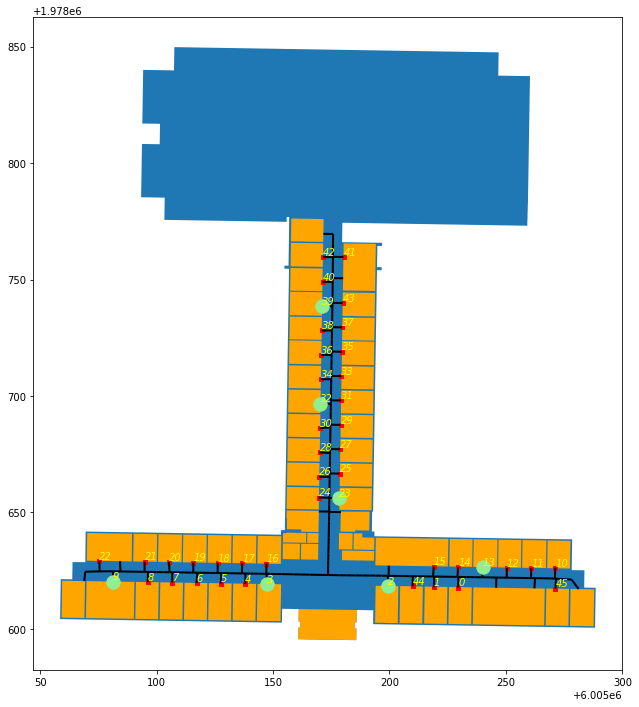

In [113]:
# path-overlap
#var_solutions = [2, 3, 12, 22, 23, 32, 37]

# ACLP
#var_solutions = [17, 21, 26, 34, 43, 44, 45]

# DACLP
#var_solutions = [12, 19, 22, 28, 34, 43, 44]

var_solutions = [2, 3, 9, 13, 23, 32, 39]
#var_solutions = [1, 3]

#solutions = snapped_offices[snapped_offices.oid.isin(var_solutions)]
solutions = snapped_offices[snapped_offices.id.isin(var_solutions)]
#DACLP_map = snapped_offices[snapped_offices.id.isin(DACL_sol)]
#ACLP_map = snapped_offices[snapped_offices.id.isin(ACL_sol)]

base = ellison_boundary.plot(figsize=(12, 12), zorder=0)
offices_polygon4.plot(ax=base, color='orange')
arcs.plot(ax=base, linewidth=2, color="k",)
snapped_offices.plot(ax=base, color="red", marker="s", markersize= 10, zorder=1)
solutions.plot(ax=base, color="lightgreen", marker="o", markersize= 180, zorder=2)
#ACLP_map.plot(ax=base, color="yellow", marker="o", markersize= 180, zorder=2)
#DACLP_map.plot(ax=base, color="red", marker="o", markersize= 180, zorder=2)
#solutions.annotate(text='id', xy=_lab_loc(x), )
obs_labels(snapped_offices, base, 10, 'id', 'yellow', 3)
#obs_labels(avoid_D, base, 24, 'D', 'magenta', 4)

In [46]:
os.chdir("/Users/sburtner/Documents/Minigrant/MRCI")

p.write("Ellison_path_overlap_12-16", "l")

Citation:

@misc{Gaboardi2018,
    author    = {Gaboardi, James D. and Laura, Jay and Rey, Sergio and 
                 Wolf, Levi John and Folch, David C. and Kang, Wei and 
                 Stephens, Philip and Schmidt, Charles},
    month     = {oct},
    year      = {2018},
    title     = {pysal/spaghetti},
    url       = {https://github.com/pysal/spaghetti},
    doi       = {10.5281/zenodo.1343650},
    keywords  = {graph-theory,network-analysis,python,spatial-networks,topology}
}